In [1]:
#This project is done by Anubhav Singh, 2nd Year MBA student at BIM Trichy. 
#Reach out today - workwithanubhav.github.io | anubhavofficialwork@gmail.com | https://www.linkedin.com/in/contactanubhavsingh/

In [151]:
#Python libraries installation window
!pip install WordCloud

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)


In [5]:
#Python libraties in use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [7]:
#displaying columns as full word
pd.set_option('display.max_columns', None)

In [9]:
#Loading CSV file Viral_Social_Media_Trends.csv
data_frame=pd.read_csv("Viral_Social_Media_Trends.csv")
# Display the shape of the dataset
print(f"Dataset contains {data_frame.shape[0]} rows and {data_frame.shape[1]} columns.")
# Preview the first 5 rows
data_frame.head(10)

Dataset contains 5000 rows and 10 columns.


Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0   Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1   Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2   Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3   Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4   Post_5     TikTok      #Dance         Post     Brazil    64866  171361   
5   Post_6  Instagram  #Challenge       Shorts  Australia  1323566  136282   
6   Post_7    YouTube     #Comedy        Tweet      Japan   627233   84121   
7   Post_8    YouTube     #Gaming       Shorts         UK  2066886  317502   
8   Post_9    Twitter  #Education  Live Stream      India  2169523  496078   
9  Post_10     TikTok     #Gaming       Shorts      India  3898384    8634   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium  
5   86979     47129              Low  
6   97973     32648           Medium  
7   45222     33638             High  
8   96041     30174           Medium  
9   69378     42700              Low

In [11]:
#Initial inspection
#Describe
print("Data set description")
data_frame.describe()

Data set description


Views          Likes        Shares      Comments
count  5.000000e+03    5000.000000   5000.000000   5000.000000
mean   2.494066e+06  251475.029800  50519.562000  24888.393800
std    1.459490e+06  144349.583384  29066.362671  14284.504319
min    1.266000e+03     490.000000     52.000000     18.000000
25%    1.186207e+06  126892.250000  25029.000000  12305.250000
50%    2.497373e+06  249443.000000  50839.500000  25004.000000
75%    3.759781e+06  373970.750000  75774.250000  37072.750000
max    4.999430e+06  499922.000000  99978.000000  49993.000000

In [13]:
#Information
print("Data set information")
data_frame.info()

Data set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [15]:
#Number of unique values
print("Checking data set with number of unique values")
data_frame.nunique()

Checking data set with number of unique values


Post_ID             5000
Platform               4
Hashtag               10
Content_Type           6
Region                 8
Views               4996
Likes               4972
Shares              4877
Comments            4735
Engagement_Level       3
dtype: int64

In [17]:
#Data preprocessing
#1. Handling missing values
missing_values = data_frame.isnull()
print("Missing values per column:\n", missing_values)

Missing values per column:
       Post_ID  Platform  Hashtag  Content_Type  Region  Views  Likes  Shares  \
0       False     False    False         False   False  False  False   False   
1       False     False    False         False   False  False  False   False   
2       False     False    False         False   False  False  False   False   
3       False     False    False         False   False  False  False   False   
4       False     False    False         False   False  False  False   False   
...       ...       ...      ...           ...     ...    ...    ...     ...   
4995    False     False    False         False   False  False  False   False   
4996    False     False    False         False   False  False  False   False   
4997    False     False    False         False   False  False  False   False   
4998    False     False    False         False   False  False  False   False   
4999    False     False    False         False   False  False  False   False   

      Comme

In [19]:
#2. Cleaning categorical Data [Removing white spaces and converting them to lowercase]
cat_cols = ['Platform', 'Hashtag', 'Content_Type', 'Region', 'Engagement_Level']
for cols in cat_cols:
    data_frame[cols] = data_frame[cols].str.strip().str.lower()

data_frame.head()

Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     tiktok  #challenge        video         uk  4163464  339431   
1  Post_2  instagram  #education       shorts      india  4155940  215240   
2  Post_3    twitter  #challenge        video     brazil  3666211  327143   
3  Post_4    youtube  #education       shorts  australia   917951  127125   
4  Post_5     tiktok      #dance         post     brazil    64866  171361   

   Shares  Comments Engagement_Level  
0   53135     19346             high  
1   65860     27239           medium  
2   39423     36223           medium  
3   11687     36806              low  
4   69581      6376           medium

In [21]:
#3. Convert numeric data to integers
num_cols = ['Views', 'Likes', 'Shares', 'Comments']
data_frame[num_cols] = data_frame[num_cols].astype(int)
# Ensure Engagement_Level is categorical
data_frame['Engagement_Level'] = pd.Categorical(data_frame['Engagement_Level'], categories=['low', 'medium', 'high'], ordered=True)

In [23]:
#4. Remove duplicate posts
data_frame.drop_duplicates(subset='Post_ID', inplace=True)

In [25]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Post_ID           5000 non-null   object  
 1   Platform          5000 non-null   object  
 2   Hashtag           5000 non-null   object  
 3   Content_Type      5000 non-null   object  
 4   Region            5000 non-null   object  
 5   Views             5000 non-null   int32   
 6   Likes             5000 non-null   int32   
 7   Shares            5000 non-null   int32   
 8   Comments          5000 non-null   int32   
 9   Engagement_Level  5000 non-null   category
dtypes: category(1), int32(4), object(5)
memory usage: 278.6+ KB


In [27]:
#5. Extreme values handling
data_frame[num_cols].describe()

Views          Likes        Shares      Comments
count  5.000000e+03    5000.000000   5000.000000   5000.000000
mean   2.494066e+06  251475.029800  50519.562000  24888.393800
std    1.459490e+06  144349.583384  29066.362671  14284.504319
min    1.266000e+03     490.000000     52.000000     18.000000
25%    1.186207e+06  126892.250000  25029.000000  12305.250000
50%    2.497373e+06  249443.000000  50839.500000  25004.000000
75%    3.759781e+06  373970.750000  75774.250000  37072.750000
max    4.999430e+06  499922.000000  99978.000000  49993.000000

In [29]:
#6. Feature engineering
#a. Total engagement = Comments + Likes + Shares
data_frame['Total_engagement'] = data_frame['Comments'] + data_frame['Likes'] + data_frame['Shares']

#b. Engagement Rate = Total engagement/Views
data_frame['Engagement_rate'] = data_frame['Total_engagement'] / data_frame['Views']

#c. Hashtag length = {#Gaming = 7}
data_frame['Hashtag_length'] = data_frame['Hashtag'].apply(len)

In [31]:
#7. Summary
print(data_frame.shape)
data_frame.info()
data_frame.head()

(5000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Post_ID           5000 non-null   object  
 1   Platform          5000 non-null   object  
 2   Hashtag           5000 non-null   object  
 3   Content_Type      5000 non-null   object  
 4   Region            5000 non-null   object  
 5   Views             5000 non-null   int32   
 6   Likes             5000 non-null   int32   
 7   Shares            5000 non-null   int32   
 8   Comments          5000 non-null   int32   
 9   Engagement_Level  5000 non-null   category
 10  Total_engagement  5000 non-null   int32   
 11  Engagement_rate   5000 non-null   float64 
 12  Hashtag_length    5000 non-null   int64   
dtypes: category(1), float64(1), int32(5), int64(1), object(5)
memory usage: 376.2+ KB


Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     tiktok  #challenge        video         uk  4163464  339431   
1  Post_2  instagram  #education       shorts      india  4155940  215240   
2  Post_3    twitter  #challenge        video     brazil  3666211  327143   
3  Post_4    youtube  #education       shorts  australia   917951  127125   
4  Post_5     tiktok      #dance         post     brazil    64866  171361   

   Shares  Comments Engagement_Level  Total_engagement  Engagement_rate  \
0   53135     19346             high            411912         0.098935   
1   65860     27239           medium            308339         0.074192   
2   39423     36223           medium            402789         0.109865   
3   11687     36806              low            175618         0.191315   
4   69581      6376           medium            247318         3.812752   

   Hashtag_length  
0              10  
1              10  
2              10  
3              10  
4               6

In [69]:
#Analysis
#1. Univariate analysis
#Categorical
#a. Identify most-used platforms in the dataset
#b. Understand the dominance of each content type
#c. See where viral content is emerging from
#d. Discover most common viral hashtags
#e. Check label distribution for classification

#Numerical
#a. Examine distribution and identify outliers
#b. Understand central tendency and spread of each metric
#c. Examine overall interaction volume
#d. Identify relative engagement per view
#e. Check if short or long hashtags dominate

Platform Counts:
 Platform
youtube      1324
tiktok       1260
instagram    1212
twitter      1204
Name: count, dtype: int64

Platform Percentage:
 Platform
youtube      26.48
tiktok       25.20
instagram    24.24
twitter      24.08
Name: proportion, dtype: float64


C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2150028587.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_frame, x='Platform', order=platform_counts.index, palette='Set1')


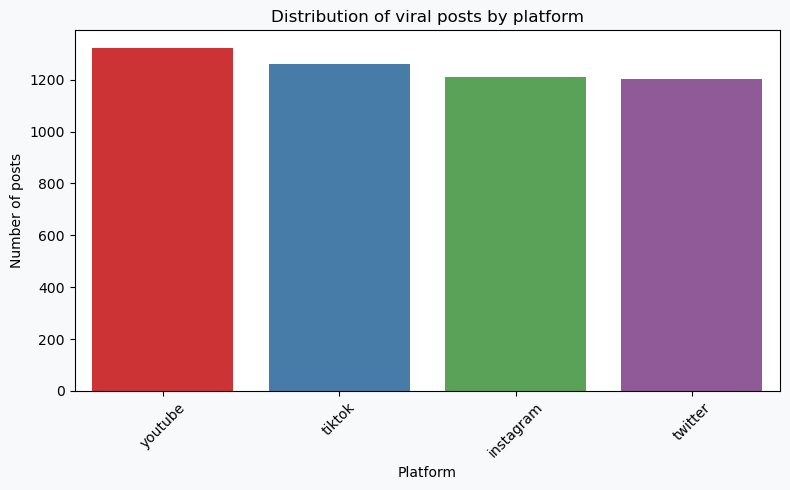

In [35]:
#a. Identify most-used platforms in the dataset
platform_counts = data_frame['Platform'].value_counts()
platform_percent = data_frame['Platform'].value_counts(normalize=True) * 100
background_color = '#F7F9FA'
# Display results
print("Platform Counts:\n", platform_counts)
print("\nPlatform Percentage:\n", platform_percent.round(2))

#Output
plt.figure(figsize=(8,5), facecolor=background_color)
sns.countplot(data=data_frame, x='Platform', order=platform_counts.index, palette='Set1')
plt.title('Distribution of viral posts by platform')
plt.xlabel('Platform')
plt.ylabel('Number of posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('platform_distribution.png', dpi=300)
plt.show()

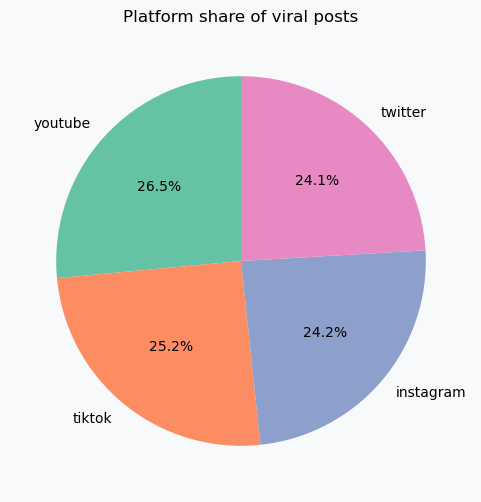

In [37]:
#Pie chart
plt.figure(figsize=(6,6), facecolor=background_color)
platform_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.ylabel('')
plt.title('Platform share of viral posts')
plt.savefig('platform_share.png', dpi=300, transparent=False)
plt.show()

In [113]:
#Interpretation - Platform Analysis
#YouTube leads with 26.48% of viral posts, closely followed by TikTok, Instagram, and Twitter—indicating an almost even platform distribution across virality.

Content Type Counts:
 Content_Type
live stream    855
post           853
reel           841
tweet          836
video          828
shorts         787
Name: count, dtype: int64

Content Type Percentages:
 Content_Type
live stream    17.10
post           17.06
reel           16.82
tweet          16.72
video          16.56
shorts         15.74
Name: proportion, dtype: float64


C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2986318656.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_frame, x='Content_Type', order=content_counts.index, palette='Set3')


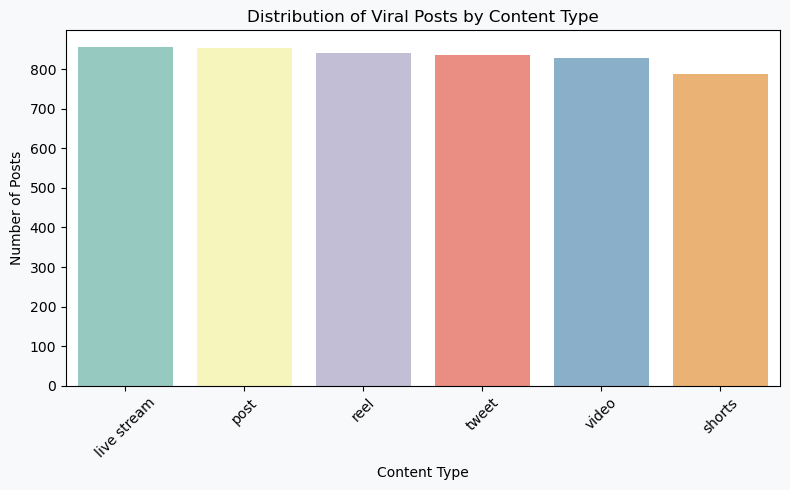

In [41]:
#b. Understand the dominance of each content type
# Count of each content type
content_counts = data_frame['Content_Type'].value_counts()
content_percent = data_frame['Content_Type'].value_counts(normalize=True) * 100

print("Content Type Counts:\n", content_counts)
print("\nContent Type Percentages:\n", content_percent.round(2))

plt.figure(figsize=(8,5), facecolor=background_color)
sns.countplot(data=data_frame, x='Content_Type', order=content_counts.index, palette='Set3')
plt.title('Distribution of Viral Posts by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('content_type_distribution.png', dpi=300)
plt.show()

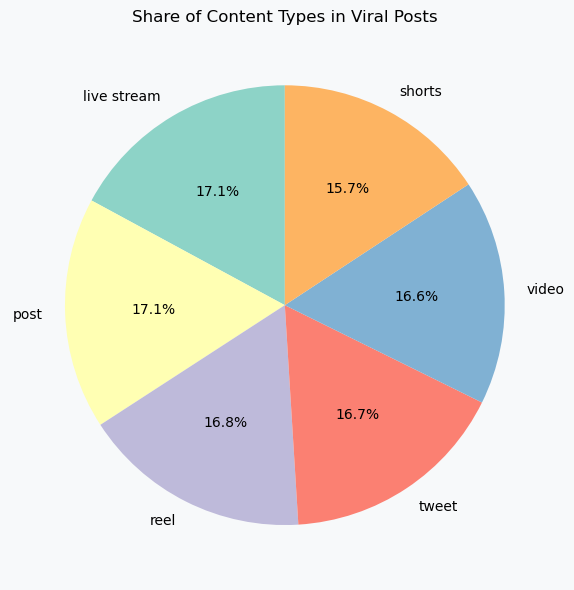

In [43]:
plt.figure(figsize=(6,6), facecolor=background_color)
content_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.ylabel('')
plt.title('Share of Content Types in Viral Posts')
plt.tight_layout()
plt.savefig('content_type_pie_chart.png', dpi=300)
plt.show()

In [115]:
#Interpretation - Content Type Analysis
#Live Streams and Posts are the most common content types in viral posts, but Reels, Tweets, and Shorts also contribute significantly—highlighting a diverse content strategy across platforms.

Top 10 Regions by Viral Post Count:
 Region
usa          677
canada       658
uk           647
brazil       641
india        617
australia    602
japan        592
germany      566
Name: count, dtype: int64

Top 10 Regions by Percentage:
 Region
usa          13.54
canada       13.16
uk           12.94
brazil       12.82
india        12.34
australia    12.04
japan        11.84
germany      11.32
Name: proportion, dtype: float64


C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\700268790.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.head(10).values, y=region_counts.head(10).index, palette='coolwarm')


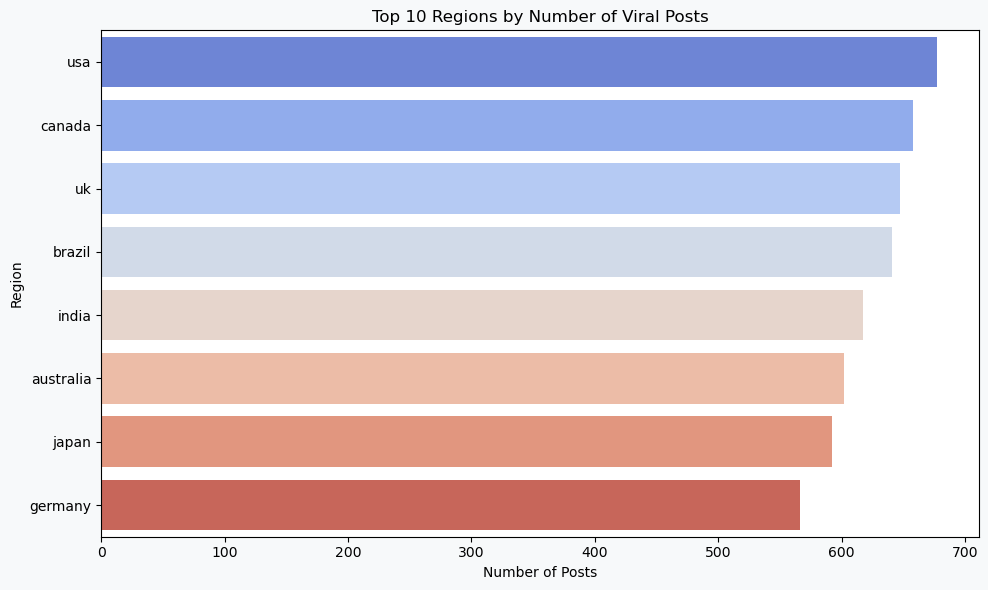

In [45]:
#c. See where viral content is emerging from
# Count of posts per region
region_counts = data_frame['Region'].value_counts()
region_percent = data_frame['Region'].value_counts(normalize=True) * 100

# Display top 10 regions
print("Top 10 Regions by Viral Post Count:\n", region_counts.head(10))
print("\nTop 10 Regions by Percentage:\n", region_percent.head(10).round(2))

# Plot top 10 regions
plt.figure(figsize=(10,6), facecolor=background_color)
sns.barplot(x=region_counts.head(10).values, y=region_counts.head(10).index, palette='coolwarm')
plt.title('Top 10 Regions by Number of Viral Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Region')
plt.tight_layout()
plt.savefig('top_regions_distribution.png', dpi=300)
plt.show()

In [125]:
#Interpretation - 
#The USA, Canada, and the UK lead in viral content volume, collectively contributing nearly 40% of all viral posts—highlighting strong content traction in English-speaking, digitally mature regions.

Top 20 Viral Hashtags:
 Hashtag
#fitness      536
#education    525
#challenge    507
#comedy       505
#dance        496
#music        493
#tech         491
#fashion      487
#viral        481
#gaming       479
Name: count, dtype: int64


C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\1256760011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='Spectral')


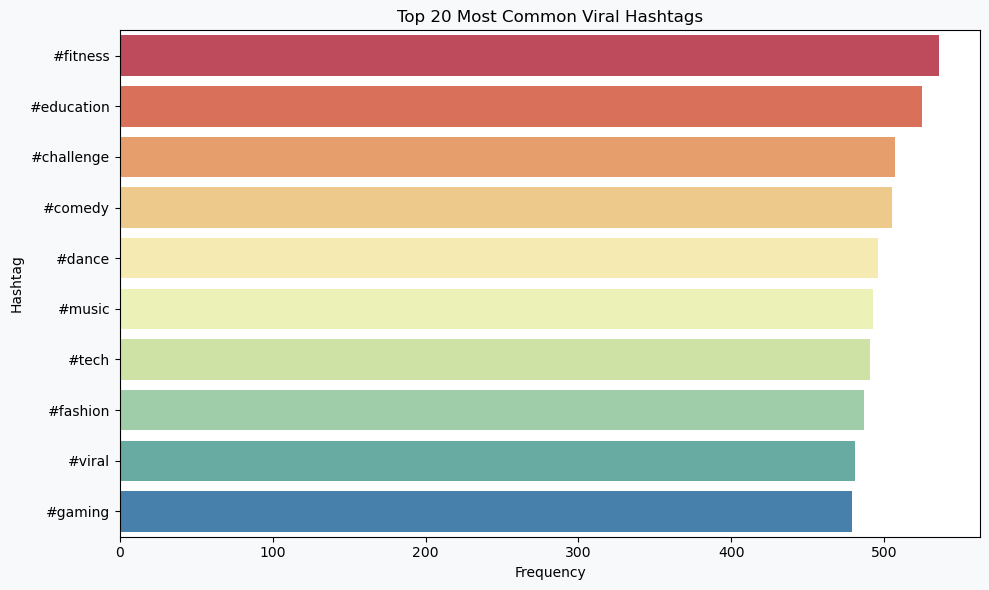

In [47]:
#d. Discover most common viral hashtags
# Count of top 20 hashtags
top_hashtags = data_frame['Hashtag'].value_counts().head(20)
print("Top 20 Viral Hashtags:\n", top_hashtags)

plt.figure(figsize=(10,6), facecolor=background_color)
sns.barplot(x=top_hashtags.values, y=top_hashtags.index, palette='Spectral')
plt.title('Top 20 Most Common Viral Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.savefig('top_hashtags_barplot.png', dpi=300)
plt.show()

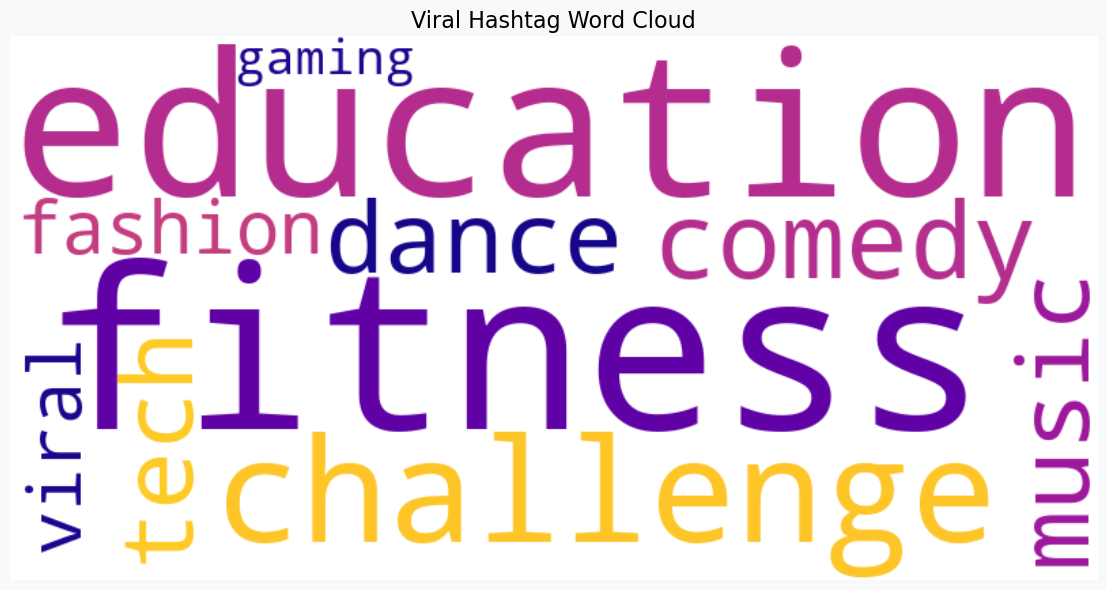

In [49]:
# Join all hashtags into one string
hashtags_combined = " ".join(data_frame['Hashtag'].dropna().astype(str).tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(hashtags_combined)

# Plot
plt.figure(figsize=(12,6), facecolor=background_color)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Viral Hashtag Word Cloud', fontsize=16)
plt.tight_layout()
plt.savefig('viral_hashtags_wordcloud.png', dpi=300, transparent=False)
plt.show()

In [161]:
#Interpretation - 
#Hashtags like #fitness, #education, and #challenge top the viral chart, revealing that content focused on personal growth, entertainment, and interactive trends resonates most across platforms.

Engagement Level Counts:
 Engagement_Level
low       1729
high      1673
medium    1598
Name: count, dtype: int64

Engagement Level Percentages:
 Engagement_Level
low       34.58
high      33.46
medium    31.96
Name: proportion, dtype: float64


C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\3549165130.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_frame, x='Engagement_Level', order=['low', 'medium', 'high'], palette='coolwarm')


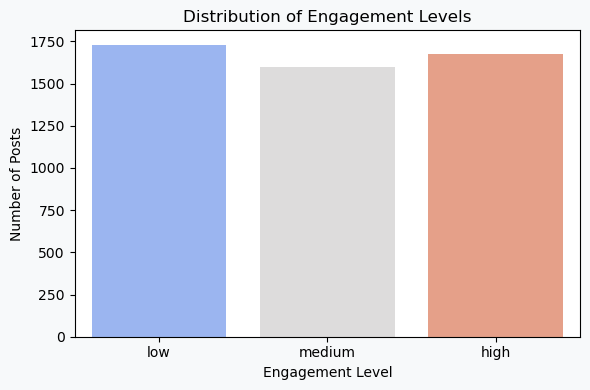

In [51]:
#e. Check label distribution for classification
# Count and percentage of each engagement level
engagement_counts = data_frame['Engagement_Level'].value_counts()
engagement_percent = data_frame['Engagement_Level'].value_counts(normalize=True) * 100

# Display results
print("Engagement Level Counts:\n", engagement_counts)
print("\nEngagement Level Percentages:\n", engagement_percent.round(2))

plt.figure(figsize=(6,4), facecolor=background_color)
sns.countplot(data=data_frame, x='Engagement_Level', order=['low', 'medium', 'high'], palette='coolwarm')
plt.title('Distribution of Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.savefig('engagement_level_distribution.png', dpi=300)
plt.show()

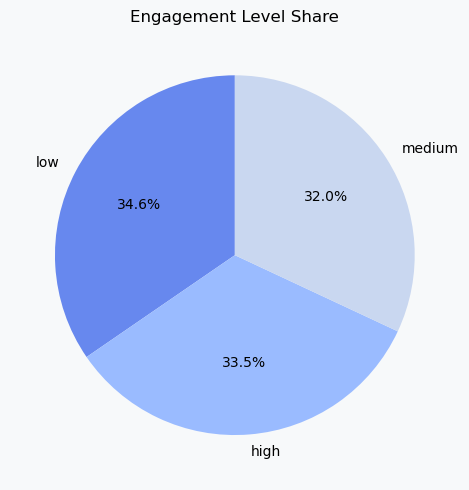

In [53]:
plt.figure(figsize=(5,5), facecolor=background_color)
engagement_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm'))
plt.ylabel('')
plt.title('Engagement Level Share')
plt.tight_layout()
plt.savefig('engagement_level_pie.png', dpi=300)
plt.show()

In [169]:
#Interpretation - 
#The dataset shows a well-balanced distribution across Low (34.6%), High (33.5%), and Medium (32.0%) engagement levels, making it ideal for multi-class classification without requiring class rebalancing techniques.

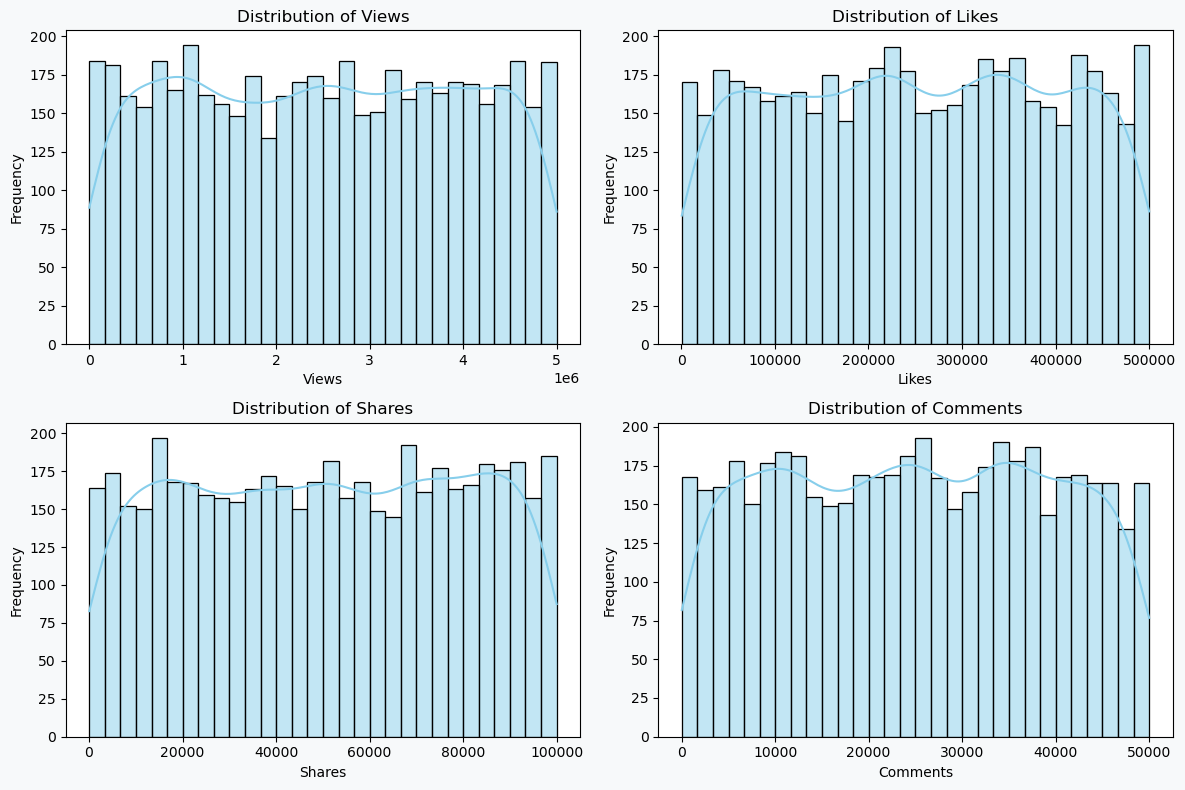

In [55]:
#Numerical
#a. Examine distribution and identify outliers
# Summary statistics for all numerical engagement metrics
data_frame[['Views', 'Likes', 'Shares', 'Comments']].describe().T

metrics = ['Views', 'Likes', 'Shares', 'Comments']
plt.figure(figsize=(12,8), facecolor=background_color)
for i, col in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_frame[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('engagement_metrics_histograms.png', dpi=300)
plt.show()

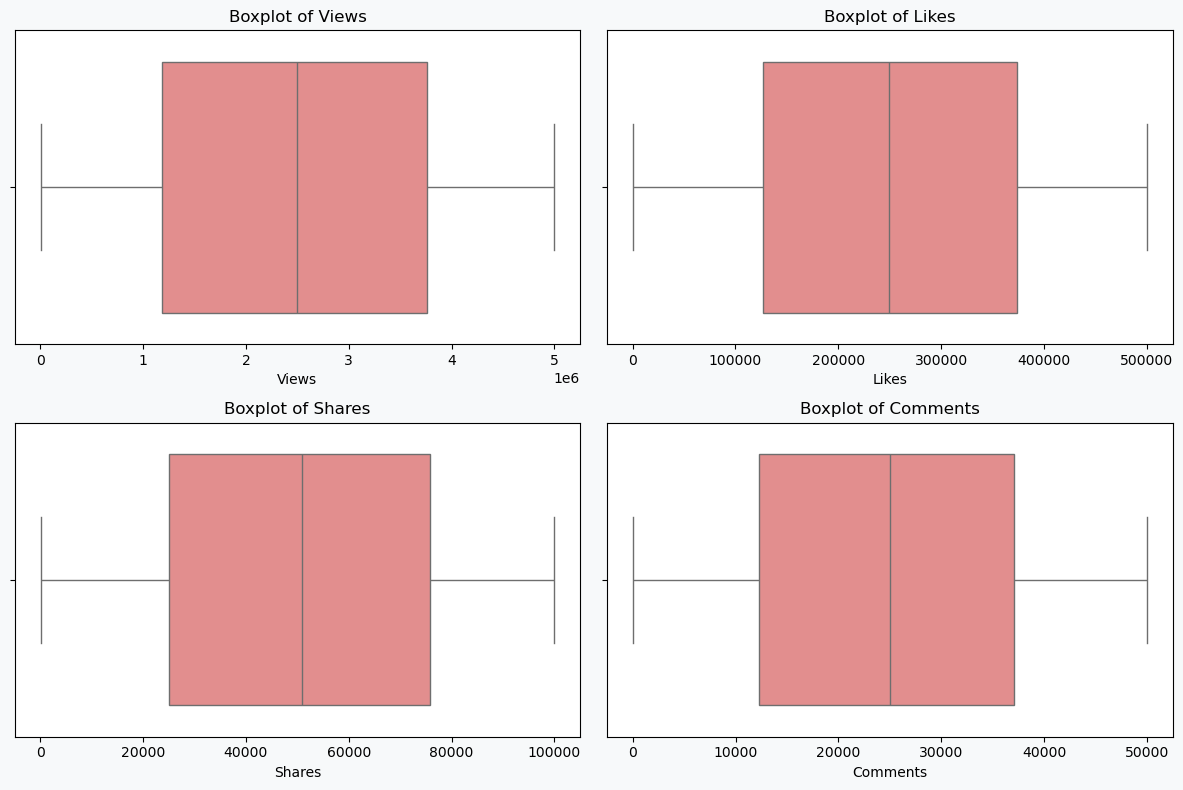

In [57]:
plt.figure(figsize=(12,8), facecolor=background_color)
for i, col in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data_frame, x=col, color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('engagement_metrics_boxplots.png', dpi=300)
plt.show()

In [59]:
# Function to detect outliers based on IQR
def detect_outliers_iqr(data_frame, col):
    Q1 = data_frame[col].quantile(0.25)
    Q3 = data_frame[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data_frame[(data_frame[col] < lower) | (data_frame[col] > upper)]
    return outliers

# Print number of outliers for each metric
for col in metrics:
    outlier_count = detect_outliers_iqr(data_frame, col).shape[0]
    print(f"{col}: {outlier_count} outliers")

Views: 0 outliers
Likes: 0 outliers
Shares: 0 outliers
Comments: 0 outliers


In [185]:
#Interpretation - 
#All engagement metrics—Views, Likes, Shares, and Comments—fall within statistically normal ranges, indicating a well-normalized dataset with no extreme outliers that could skew modeling or visual analysis.

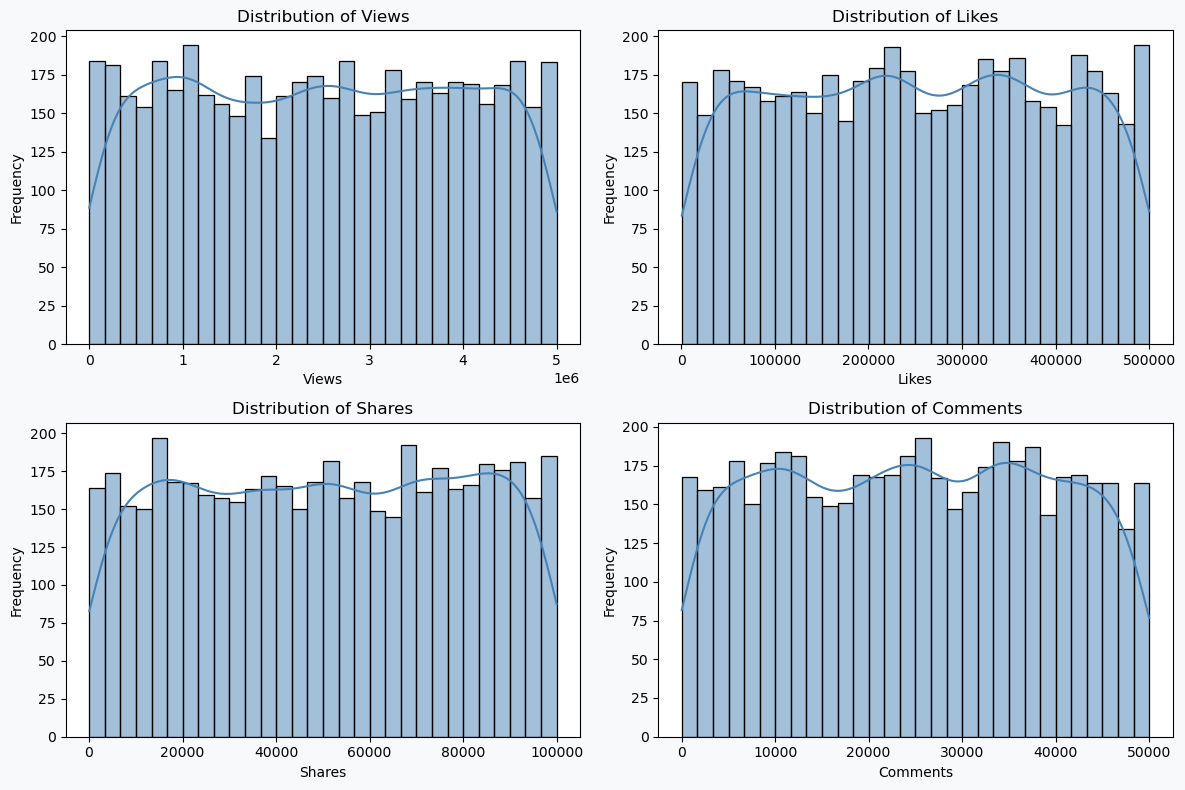

In [61]:
#b. Understand central tendency and spread of each metric
# Descriptive statistics summary
data_frame[['Views', 'Likes', 'Shares', 'Comments']].describe().T
metrics = ['Views', 'Likes', 'Shares', 'Comments']

plt.figure(figsize=(12, 8), facecolor=background_color)
for i, col in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_frame[col], bins=30, kde=True, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('metric_distribution_kde.png', dpi=300)
plt.show()

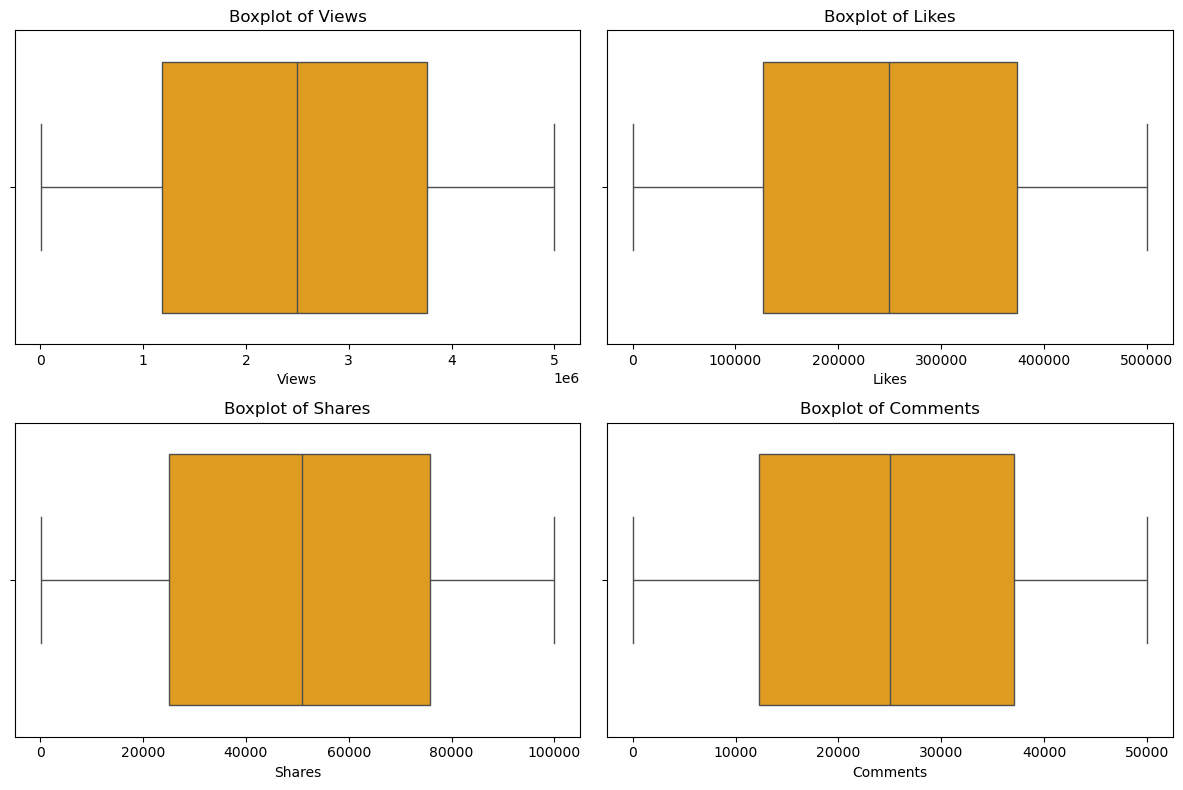

In [63]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data_frame[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('metric_boxplots.png', dpi=300)
plt.show()

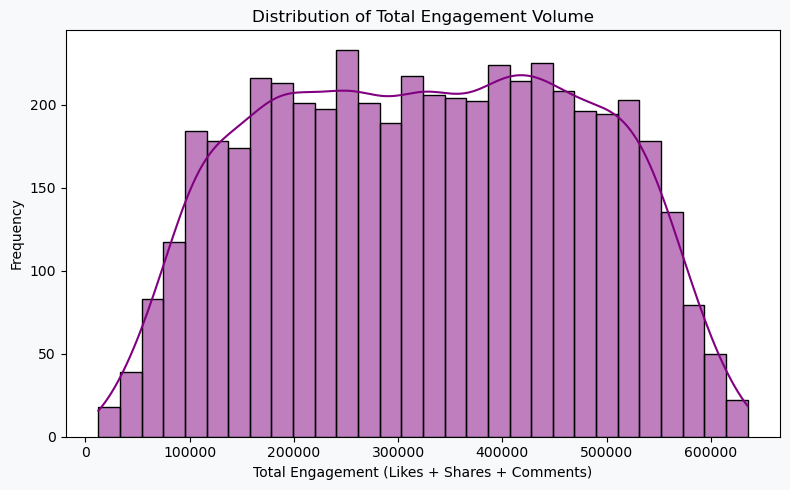

In [65]:
#c. Examine overall interaction volume
# Create Total_Engagement column if not already created
data_frame['Total_Engagement'] = data_frame['Likes'] + data_frame['Shares'] + data_frame['Comments']
data_frame['Total_Engagement'].describe()

plt.figure(figsize=(8, 5), facecolor=background_color)
sns.histplot(data_frame['Total_Engagement'], bins=30, kde=True, color='purple')
plt.title('Distribution of Total Engagement Volume')
plt.xlabel('Total Engagement (Likes + Shares + Comments)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('total_engagement_distribution.png', dpi=300)
plt.show()

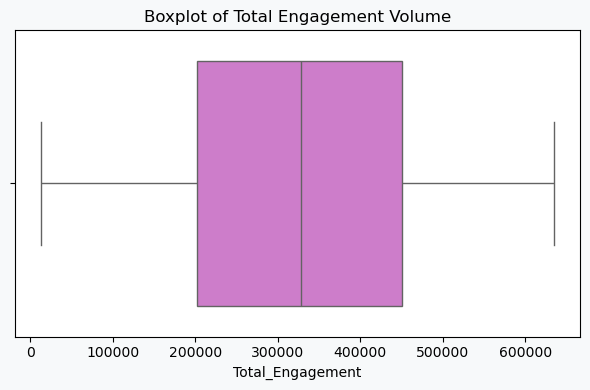

In [67]:
plt.figure(figsize=(6, 4), facecolor=background_color)
sns.boxplot(x=data_frame['Total_Engagement'], color='orchid')
plt.title('Boxplot of Total Engagement Volume')
plt.tight_layout()
plt.savefig('total_engagement_boxplot.png', dpi=300)
plt.show()

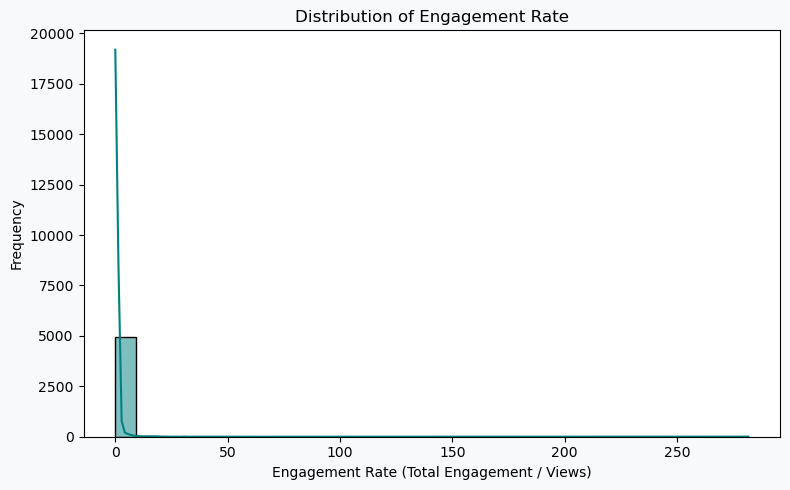

In [69]:
#d. Identify relative engagement per view
data_frame['Engagement_Rate'] = data_frame['Total_Engagement'] / data_frame['Views']
data_frame['Engagement_Rate'].describe()

plt.figure(figsize=(8, 5), facecolor=background_color)
sns.histplot(data_frame['Engagement_Rate'], bins=30, kde=True, color='teal')
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate (Total Engagement / Views)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('engagement_rate_distribution.png', dpi=300)
plt.show()

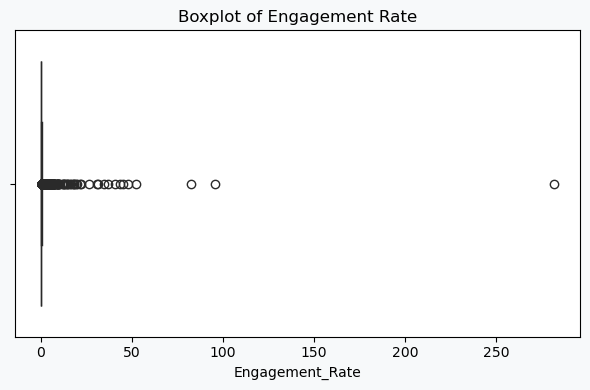

In [71]:
plt.figure(figsize=(6, 4), facecolor=background_color)
sns.boxplot(x=data_frame['Engagement_Rate'], color='darkcyan')
plt.title('Boxplot of Engagement Rate')
plt.tight_layout()
plt.savefig('engagement_rate_boxplot.png', dpi=300)
plt.show()

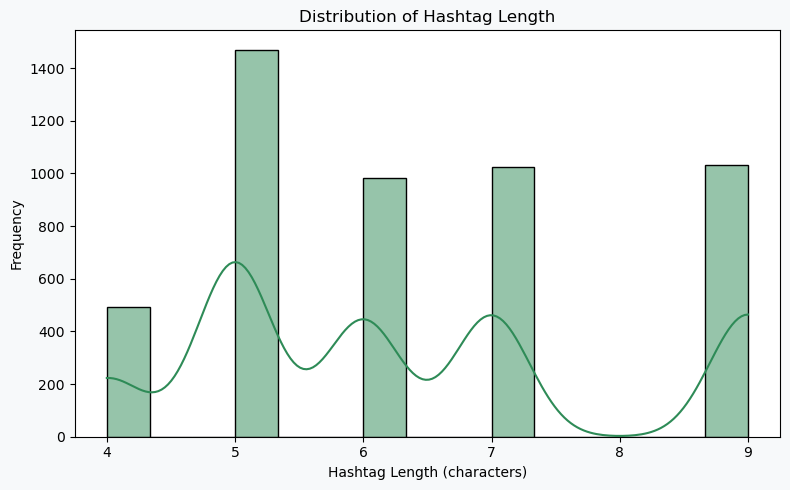

In [73]:
#e. Check if short or long hashtags dominate
data_frame['Hashtag_Length'] = data_frame['Hashtag'].str.replace('#', '').str.len()
data_frame['Hashtag_Length'].describe()

plt.figure(figsize=(8,5), facecolor=background_color)
sns.histplot(data_frame['Hashtag_Length'], bins=15, kde=True, color='seagreen')
plt.title('Distribution of Hashtag Length')
plt.xlabel('Hashtag Length (characters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('hashtag_length_distribution.png', dpi=300)
plt.show()

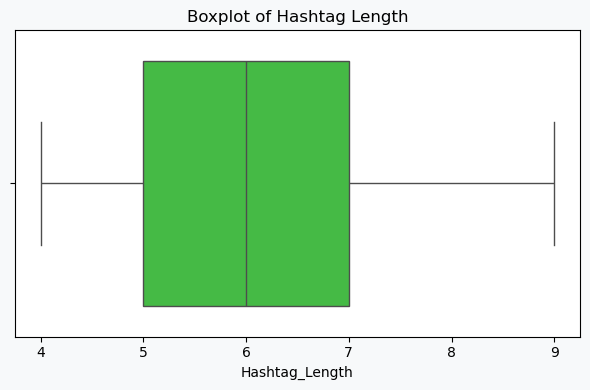

In [75]:
plt.figure(figsize=(6,4), facecolor=background_color)
sns.boxplot(x=data_frame['Hashtag_Length'], color='limegreen')
plt.title('Boxplot of Hashtag Length')
plt.tight_layout()
plt.savefig('hashtag_length_boxplot.png', dpi=300)
plt.show()

In [243]:
#2. Bivariate analysis
#Categorical vs Categorical
#a. Which platform gets more high/low engagement?
#b. Which formats (Shorts, Reels, etc.) perform best?
#c. Are some regions more likely to have high engagement?
#d. Which hashtags correlate with high engagement?
#e. Do shorter or longer hashtags lead to higher engagement?

#Categorical vs. Numerical
#a. Which platform drives higher total interaction
#b. Is one format more efficient per viewer?
#c. How do metrics differ across engagement classes?

#Numerical vs Numerical
#a. Do views lead to likes/shares?
#b. Check interaction strength
#c. Identify efficient content (low views, high interaction)
#d. Does rate affect user conversation?

#Bonus combination
#a. Find top-performing format per platform
#b. Discover localization trends in formats
#c. Spot trending hashtags per platform
#d. See if short hashtags are more efficient

Engagement_Level  low  medium  high
Platform                           
instagram         429     399   384
tiktok            432     408   420
twitter           403     377   424
youtube           465     414   445
Engagement_Level    low  medium   high
Platform                              
instagram         35.40   32.92  31.68
tiktok            34.29   32.38  33.33
twitter           33.47   31.31  35.22
youtube           35.12   31.27  33.61


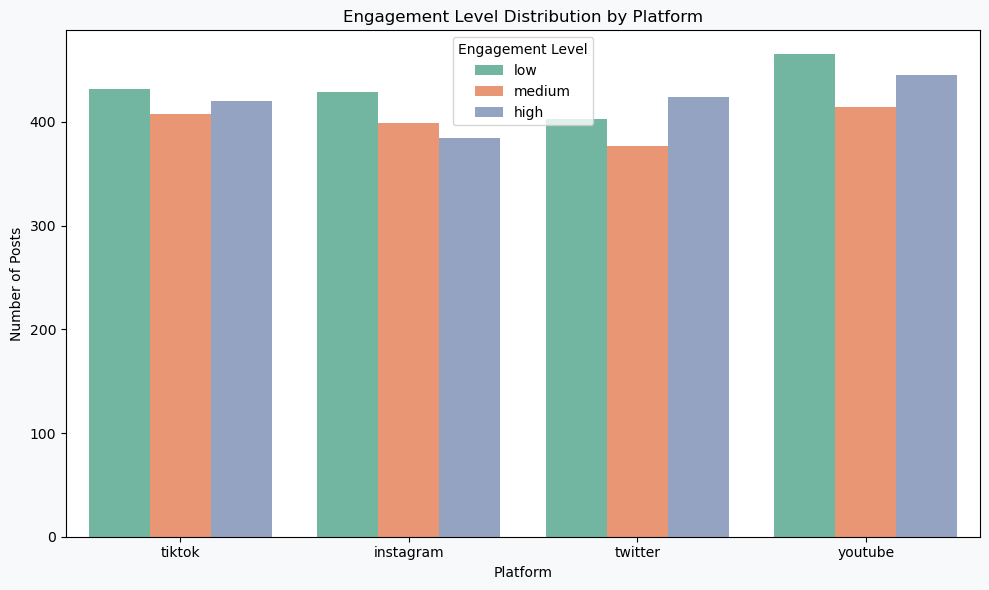

In [77]:
#a. Which platform gets more high/low engagement?
# Cross-tabulation of Platform and Engagement_Level
platform_engagement_ct = pd.crosstab(data_frame['Platform'], data_frame['Engagement_Level'])
print(platform_engagement_ct)

# Percent distribution of engagement levels 
platform_engagement_pct = pd.crosstab(data_frame['Platform'], data_frame['Engagement_Level'], normalize='index') * 100
print(platform_engagement_pct.round(2))

plt.figure(figsize=(10,6), facecolor=background_color)
sns.countplot(data=data_frame, x='Platform', hue='Engagement_Level', palette='Set2')
plt.title('Engagement Level Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.legend(title='Engagement Level')
plt.tight_layout()
plt.savefig('platform_vs_engagement_level.png', dpi=300)
plt.show()

Engagement_Level  low  medium  high
Content_Type                       
live stream       306     257   292
post              296     284   273
reel              298     256   287
shorts            273     261   253
tweet             285     271   280
video             271     269   288
Engagement_Level    low  medium   high
Content_Type                          
live stream       35.79   30.06  34.15
post              34.70   33.29  32.00
reel              35.43   30.44  34.13
shorts            34.69   33.16  32.15
tweet             34.09   32.42  33.49
video             32.73   32.49  34.78


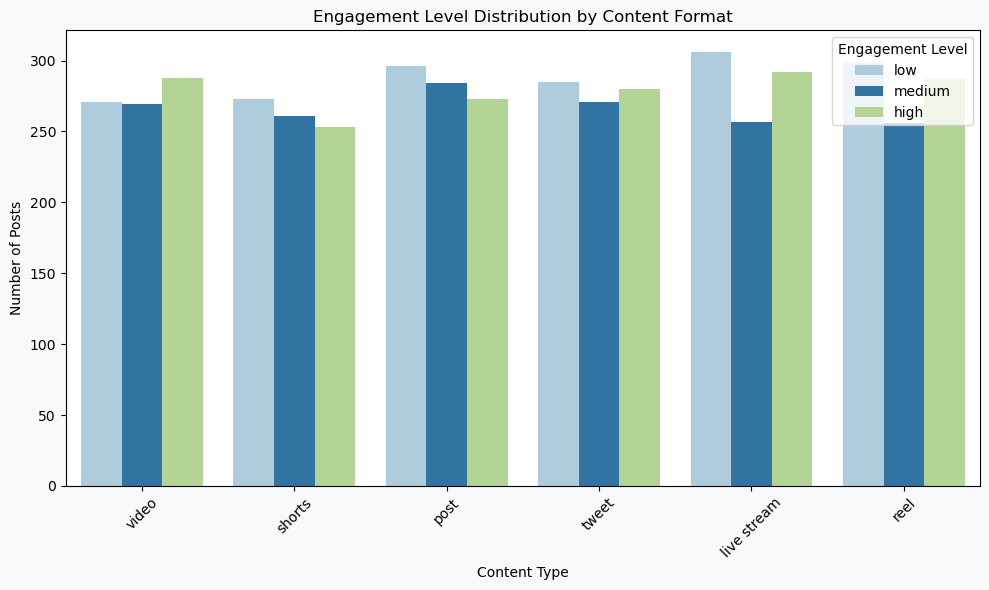

In [79]:
#b. Which formats (Shorts, Reels, etc.) perform best?
# Cross-tab of content type and engagement level
content_engagement_ct = pd.crosstab(data_frame['Content_Type'], data_frame['Engagement_Level'])
print(content_engagement_ct)

# Row-wise percentage for comparison
content_engagement_pct = pd.crosstab(data_frame['Content_Type'], data_frame['Engagement_Level'], normalize='index') * 100
print(content_engagement_pct.round(2))

plt.figure(figsize=(10,6), facecolor=background_color)
sns.countplot(data=data_frame, x='Content_Type', hue='Engagement_Level', palette='Paired')
plt.title('Engagement Level Distribution by Content Format')
plt.xlabel('Content Type')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='Engagement Level')
plt.tight_layout()
plt.savefig('content_type_vs_engagement_level.png', dpi=300)
plt.show()

Engagement_Level  low  medium  high
Region                             
usa               227     214   236
canada            226     230   202
uk                231     201   215
brazil            227     199   215
india             214     194   209
australia         204     201   197
japan             200     191   201
germany           200     168   198
Engagement_Level    low  medium   high
Region                                
usa               33.53   31.61  34.86
canada            34.35   34.95  30.70
uk                35.70   31.07  33.23
brazil            35.41   31.05  33.54
india             34.68   31.44  33.87
australia         33.89   33.39  32.72
japan             33.78   32.26  33.95
germany           35.34   29.68  34.98


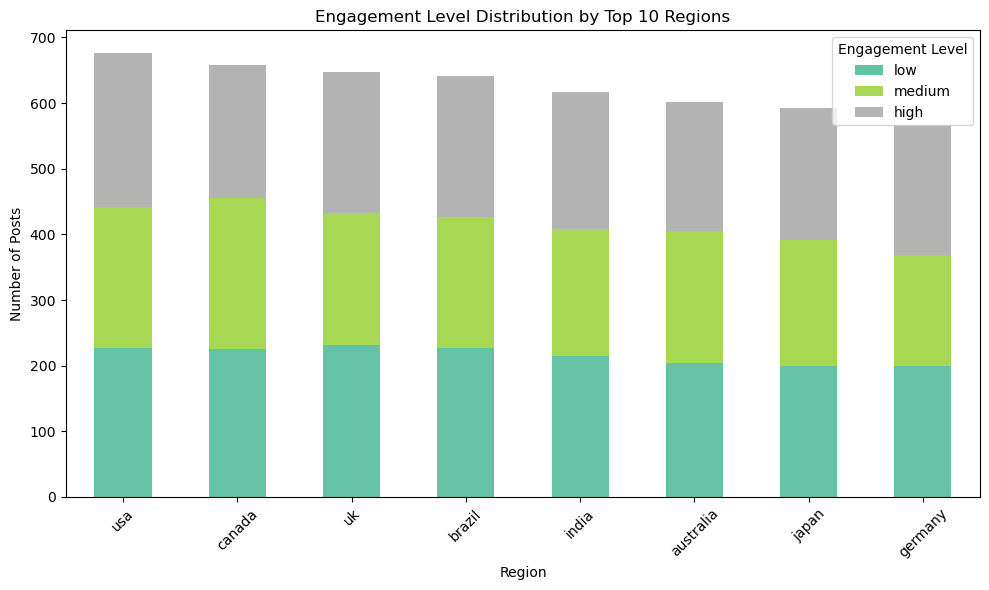

In [81]:
#c. Are some regions more likely to have high engagement?
# Cross-tab of Region and Engagement_Level
region_engagement_ct = pd.crosstab(data_frame['Region'], data_frame['Engagement_Level'])

# Sort by total posts (descending)
top_regions = region_engagement_ct.sum(axis=1).sort_values(ascending=False).head(10).index
print(region_engagement_ct.loc[top_regions])

# Row-wise percentage to compare likelihood within regions
region_engagement_pct = pd.crosstab(data_frame['Region'], data_frame['Engagement_Level'], normalize='index') * 100
print(region_engagement_pct.loc[top_regions].round(2))

region_engagement_ct.loc[top_regions].plot(
    kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Engagement Level Distribution by Top 10 Regions')
plt.xlabel('Region')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='Engagement Level')
plt.tight_layout()
plt.savefig('region_vs_engagement_level.png', dpi=300)
plt.show()

Engagement_Level  low  medium  high
Hashtag                            
#challenge        178     172   157
#comedy           165     162   178
#dance            173     148   175
#education        176     172   177
#fashion          167     157   163
#fitness          208     171   157
#gaming           178     135   166
#music            149     161   183
#tech             172     169   150
#viral            163     151   167


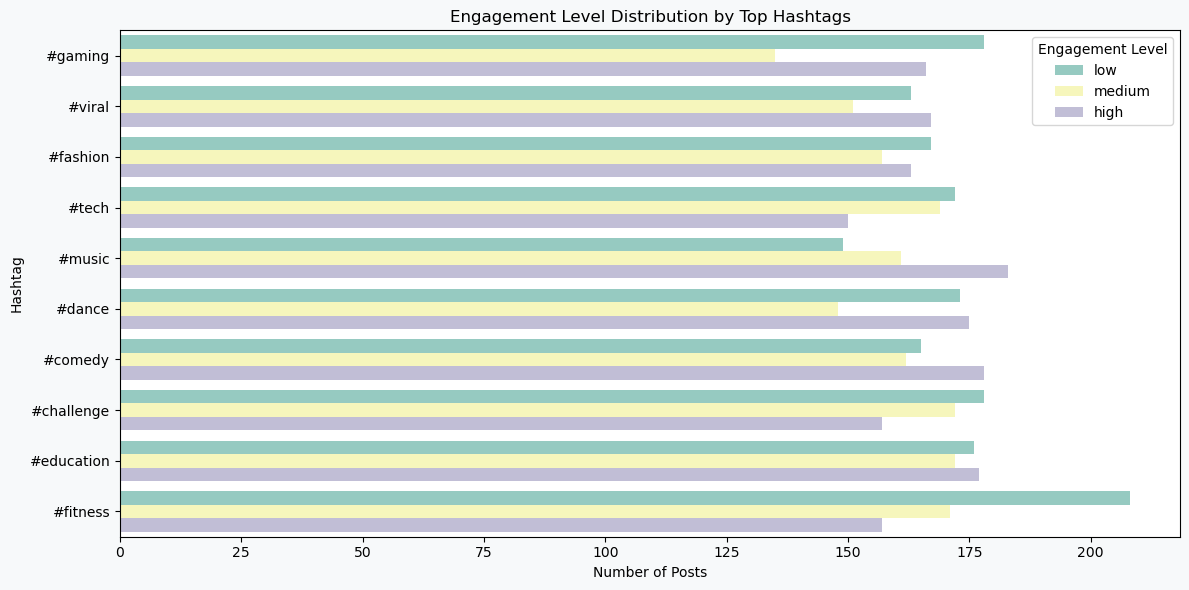

In [83]:
#d. Which hashtags correlate with high engagement?
# Identify top 15 most used hashtags
top_hashtags = data_frame['Hashtag'].value_counts().nlargest(15).index

# Filter the dataset
data_frame_top_hashtags = data_frame[data_frame['Hashtag'].isin(top_hashtags)]

# Cross-tab for top hashtags
hashtag_engagement_ct = pd.crosstab(data_frame_top_hashtags['Hashtag'], data_frame_top_hashtags['Engagement_Level'])
print(hashtag_engagement_ct)

plt.figure(figsize=(12,6), facecolor=background_color)
sns.countplot(data=data_frame_top_hashtags, y='Hashtag', hue='Engagement_Level', palette='Set3', order=top_hashtags[::-1])
plt.title('Engagement Level Distribution by Top Hashtags')
plt.xlabel('Number of Posts')
plt.ylabel('Hashtag')
plt.legend(title='Engagement Level')
plt.tight_layout()
plt.savefig('top_hashtags_vs_engagement.png', dpi=300)
plt.show()

C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\3548105887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_frame, x='Engagement_Level', y='Hashtag_Length', palette='viridis')


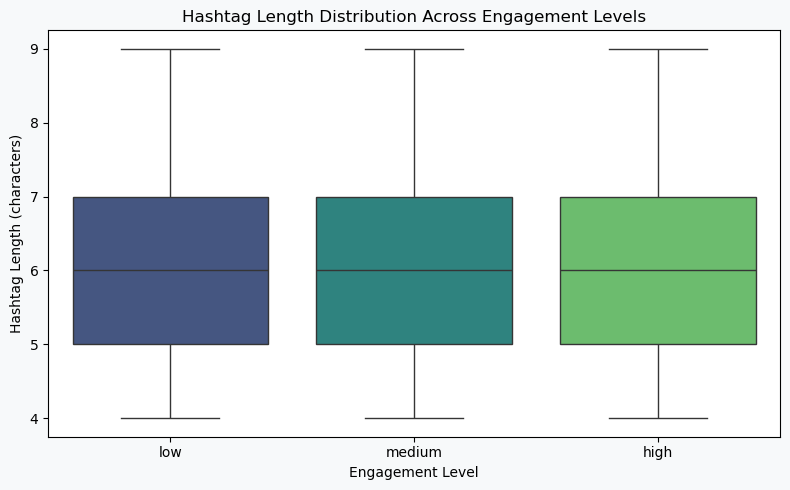

In [85]:
#e. Do shorter or longer hashtags lead to higher engagement?
plt.figure(figsize=(8,5), facecolor=background_color)
sns.boxplot(data=data_frame, x='Engagement_Level', y='Hashtag_Length', palette='viridis')
plt.title('Hashtag Length Distribution Across Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Hashtag Length (characters)')
plt.tight_layout()
plt.savefig('hashtag_length_vs_engagement_level.png', dpi=300)
plt.show()

C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2455327192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_frame, x='Engagement_Level', y='Hashtag_Length', palette='cool')


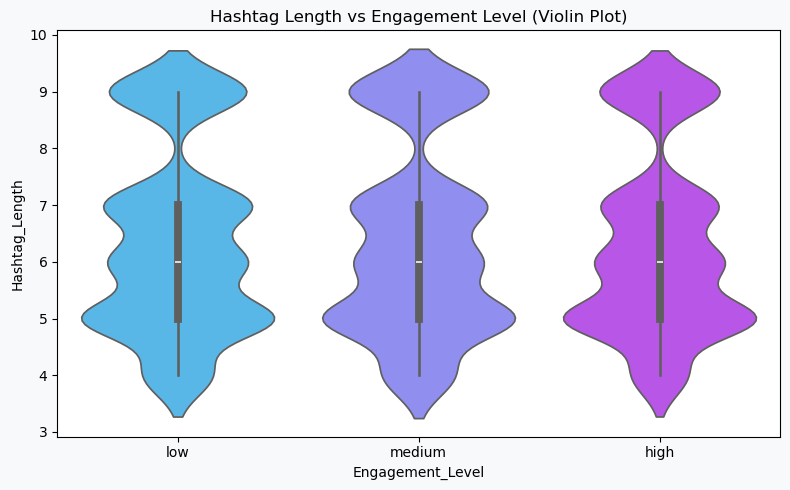

In [87]:
plt.figure(figsize=(8,5), facecolor=background_color)
sns.violinplot(data=data_frame, x='Engagement_Level', y='Hashtag_Length', palette='cool')
plt.title('Hashtag Length vs Engagement Level (Violin Plot)')
plt.tight_layout()
plt.savefig('hashtag_length_violin.png', dpi=300)
plt.show()

In [89]:
data_frame.groupby('Engagement_Level')['Hashtag_Length'].mean().round(2)

C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2337721601.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_frame.groupby('Engagement_Level')['Hashtag_Length'].mean().round(2)


Engagement_Level
low       6.35
medium    6.35
high      6.30
Name: Hashtag_Length, dtype: float64

                mean    median     max
Platform                              
instagram  332387.24  339304.5  635139
tiktok     320453.67  319691.0  622013
twitter    320564.73  315667.0  624224
youtube    333708.48  337599.0  630822


C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\3383168815.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_frame, x='Platform', y='Total_Engagement', palette='Set2')


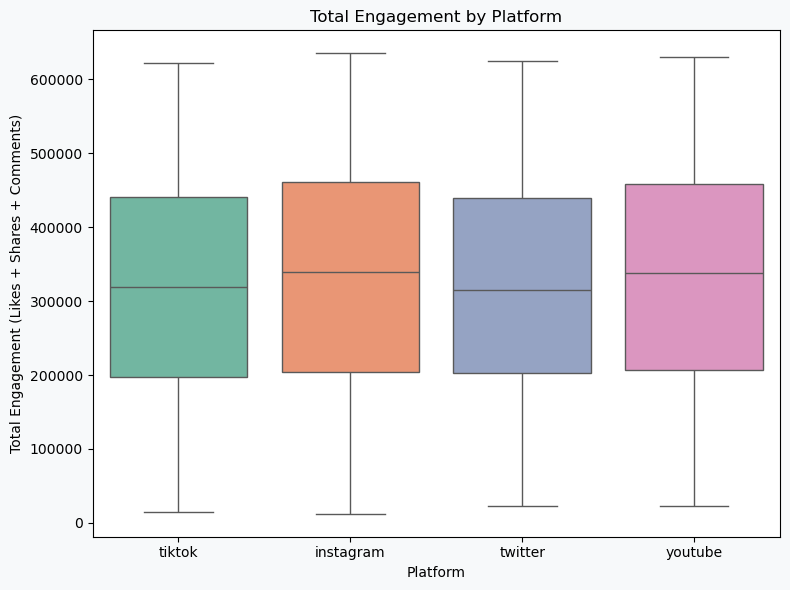

In [91]:
#Categorical vs. Numerical
#a. Which platform drives higher total interaction
# Average total engagement per platform
platform_engagement = data_frame.groupby('Platform')['Total_Engagement'].agg(['mean', 'median', 'max']).round(2)
print(platform_engagement)
plt.figure(figsize=(8,6), facecolor=background_color)
sns.boxplot(data=data_frame, x='Platform', y='Total_Engagement', palette='Set2')
plt.title('Total Engagement by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Engagement (Likes + Shares + Comments)')
plt.tight_layout()
plt.savefig('platform_vs_total_engagement.png', dpi=300)
plt.show()

C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\1817188754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_frame, x='Platform', y='Total_Engagement', palette='Spectral')


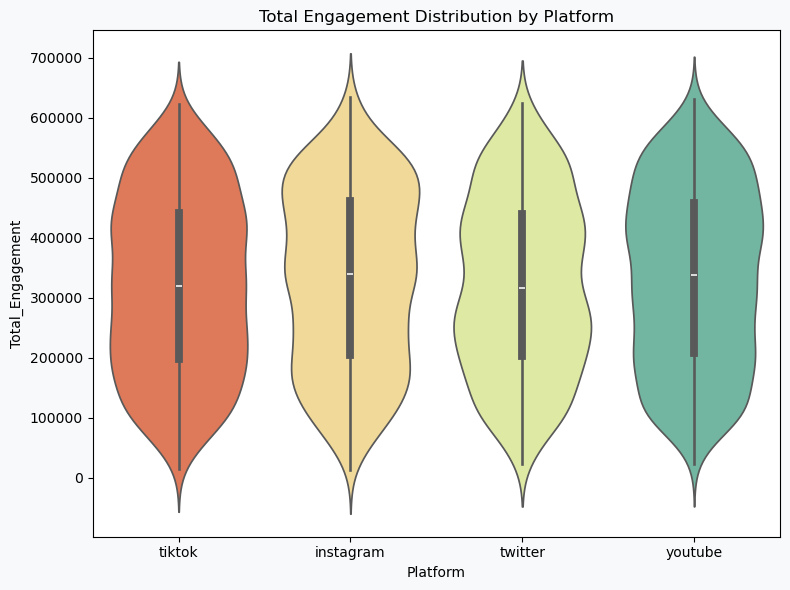

In [93]:
plt.figure(figsize=(8,6), facecolor=background_color)
sns.violinplot(data=data_frame, x='Platform', y='Total_Engagement', palette='Spectral')
plt.title('Total Engagement Distribution by Platform')
plt.tight_layout()
plt.savefig('platform_violin_total_engagement.png', dpi=300)
plt.show()

                mean  median       max
Content_Type                          
live stream   0.6188  0.1354   95.6916
post          0.4981  0.1253   52.3775
reel          0.4875  0.1331   31.2929
shorts        0.8063  0.1287  281.7417
tweet         0.5207  0.1253   44.9951
video         0.4882  0.1289   34.9410


C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\125277647.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_frame, x='Content_Type', y='Engagement_Rate', palette='coolwarm')


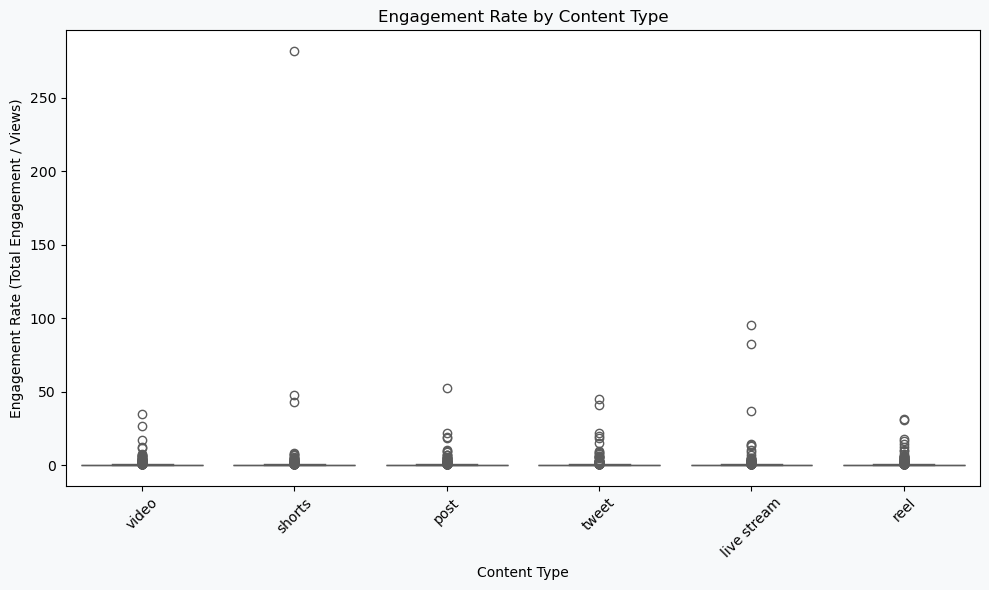

In [95]:
#b. Is one format more efficient per viewer?
# Average engagement rate per content format
content_efficiency = data_frame.groupby('Content_Type')['Engagement_Rate'].agg(['mean', 'median', 'max']).round(4)
print(content_efficiency)

plt.figure(figsize=(10,6), facecolor=background_color)
sns.boxplot(data=data_frame, x='Content_Type', y='Engagement_Rate', palette='coolwarm')
plt.title('Engagement Rate by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Engagement Rate (Total Engagement / Views)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('content_type_vs_engagement_rate.png', dpi=300)
plt.show()

C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\1331012757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_frame, x='Content_Type', y='Engagement_Rate', palette='husl')


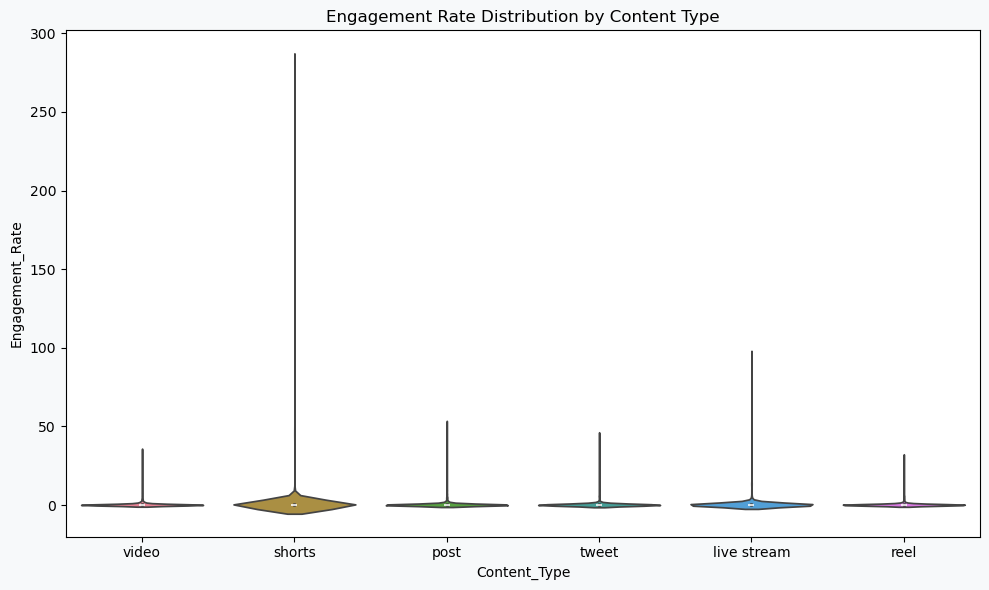

In [97]:
plt.figure(figsize=(10,6), facecolor=background_color)
sns.violinplot(data=data_frame, x='Content_Type', y='Engagement_Rate', palette='husl')
plt.title('Engagement Rate Distribution by Content Type')
plt.tight_layout()
plt.savefig('content_type_violin_engagement_rate.png', dpi=300)
plt.show()

C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2246545665.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_frame.groupby('Engagement_Level')[metrics].mean().round(2)
C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2246545665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_frame, x='Engagement_Level', y=metric, palette='Set2')


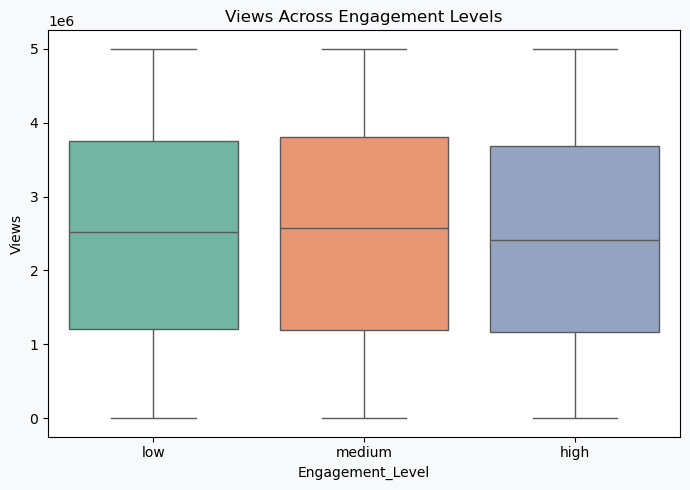

C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2246545665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_frame, x='Engagement_Level', y=metric, palette='Set2')


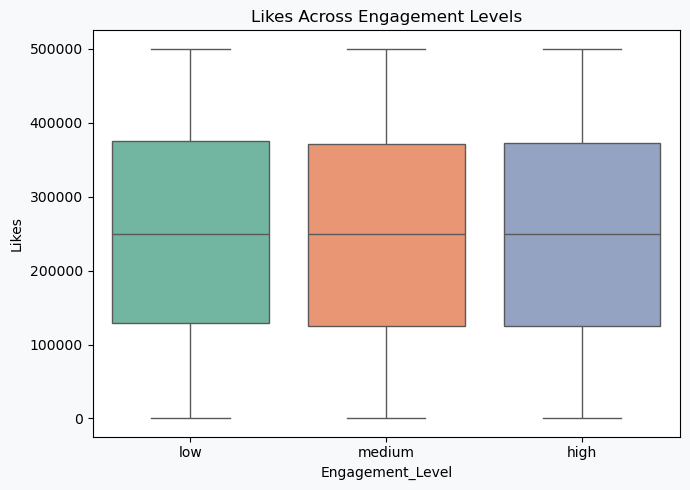

C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2246545665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_frame, x='Engagement_Level', y=metric, palette='Set2')


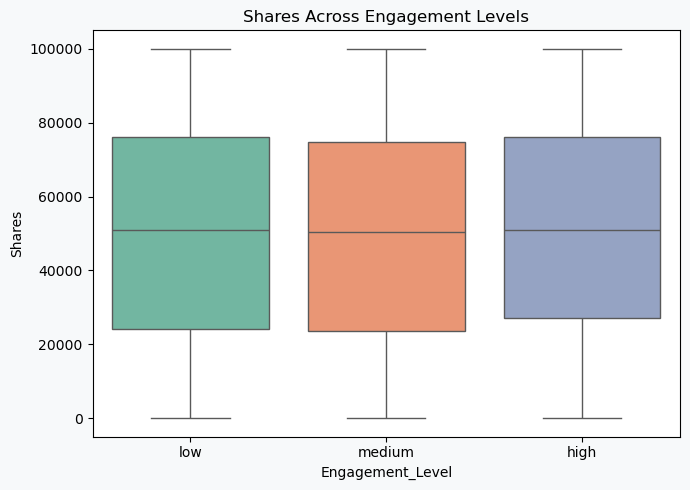

C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2246545665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_frame, x='Engagement_Level', y=metric, palette='Set2')


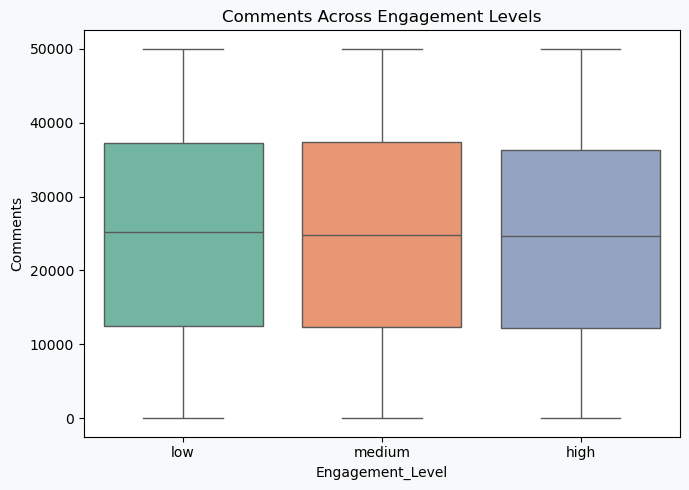

C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2246545665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_frame, x='Engagement_Level', y=metric, palette='Set2')


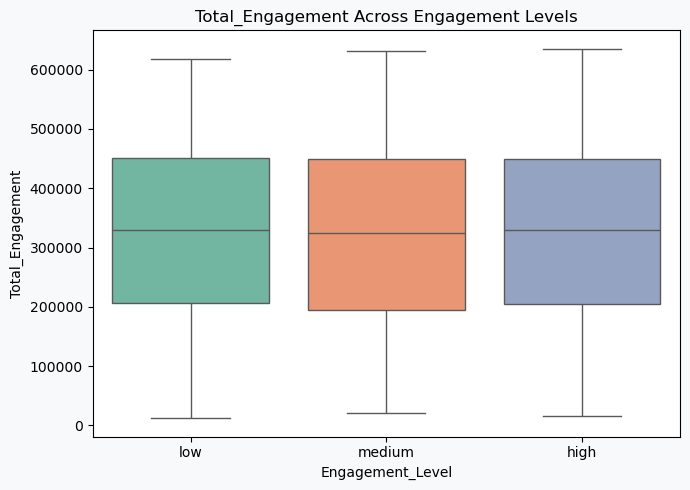

C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2246545665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_frame, x='Engagement_Level', y=metric, palette='Set2')


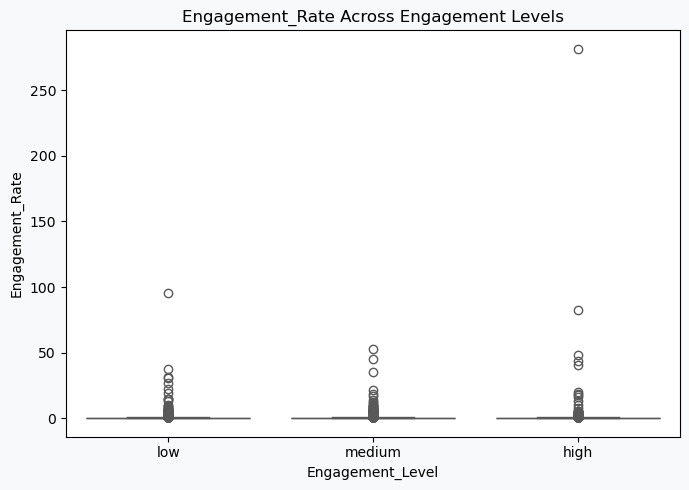

In [99]:
#c. How do metrics differ across engagement classes?
# Group by Engagement Level and describe core metrics
metrics = ['Views', 'Likes', 'Shares', 'Comments', 'Total_Engagement', 'Engagement_Rate']
data_frame.groupby('Engagement_Level')[metrics].mean().round(2)

# Boxplots for each metric grouped by engagement level
for metric in metrics:
    plt.figure(figsize=(7,5), facecolor=background_color)
    sns.boxplot(data=data_frame, x='Engagement_Level', y=metric, palette='Set2')
    plt.title(f'{metric} Across Engagement Levels')
    plt.tight_layout()
    plt.savefig(f'{metric}_vs_engagement_level.png', dpi=300)
    plt.show()

Views               1.000
Likes              -0.003
Shares              0.013
Comments           -0.010
Total_Engagement   -0.001
Engagement_Rate    -0.153
Name: Views, dtype: float64


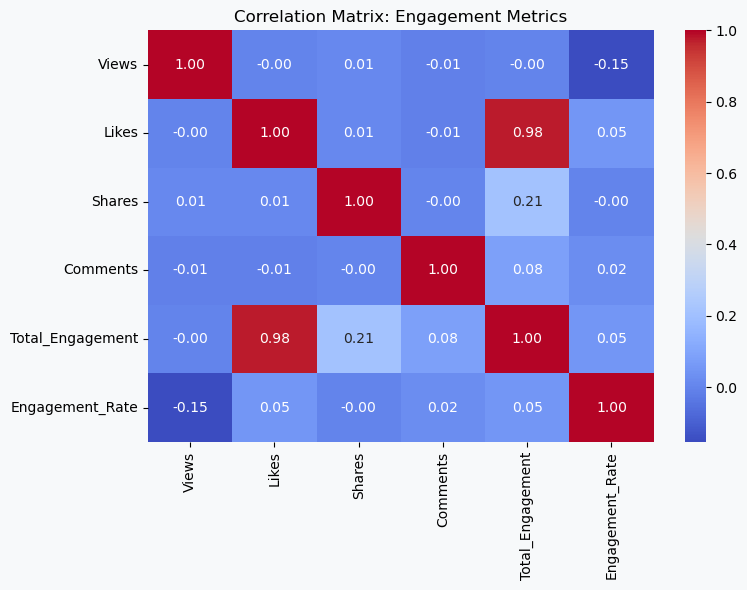

In [101]:
#Numerical vs Numerical
#a. Do views lead to likes/shares?
# Compute Pearson correlations
correlation_matrix = data_frame[['Views', 'Likes', 'Shares', 'Comments', 'Total_Engagement', 'Engagement_Rate']].corr()
print(correlation_matrix['Views'].round(3))

plt.figure(figsize=(8,6), facecolor=background_color)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Engagement Metrics')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

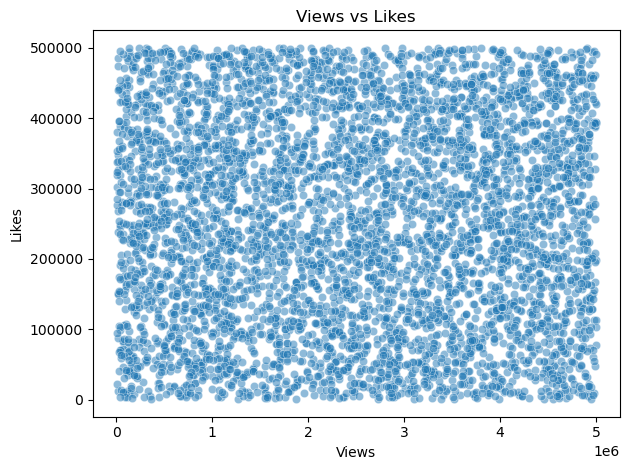

In [103]:
# Views vs. Likes
sns.scatterplot(data=data_frame, x='Views', y='Likes', alpha=0.5)
plt.title('Views vs Likes')
plt.tight_layout()
plt.savefig('views_vs_likes.png', dpi=300)
plt.show()

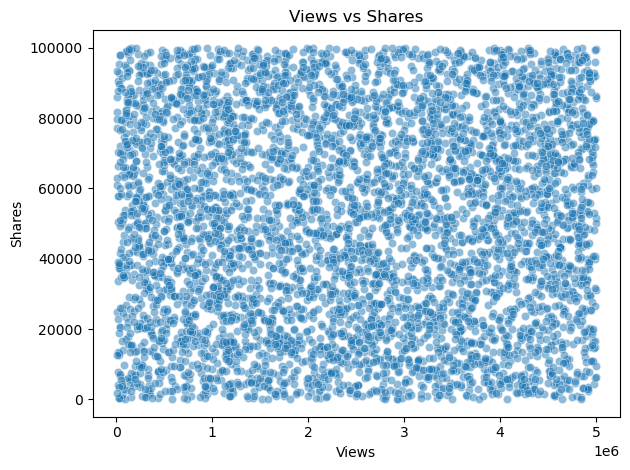

In [105]:
# Views vs. Shares
sns.scatterplot(data=data_frame, x='Views', y='Shares', alpha=0.5)
plt.title('Views vs Shares')
plt.tight_layout()
plt.savefig('views_vs_shares.png', dpi=300)
plt.show()

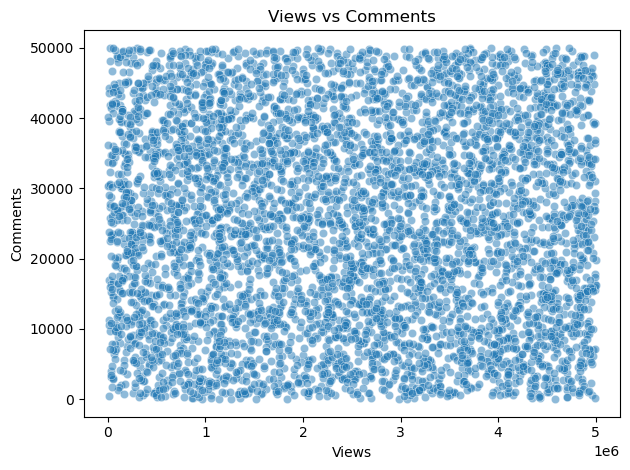

In [107]:
# Views vs. Comments
sns.scatterplot(data=data_frame, x='Views', y='Comments', alpha=0.5)
plt.title('Views vs Comments')
plt.tight_layout()
plt.savefig('views_vs_comments.png', dpi=300)
plt.show()

                  Likes  Shares  Comments  Total_Engagement
Likes              1.00    0.01     -0.01              0.98
Shares             0.01    1.00     -0.00              0.21
Comments          -0.01   -0.00      1.00              0.08
Total_Engagement   0.98    0.21      0.08              1.00


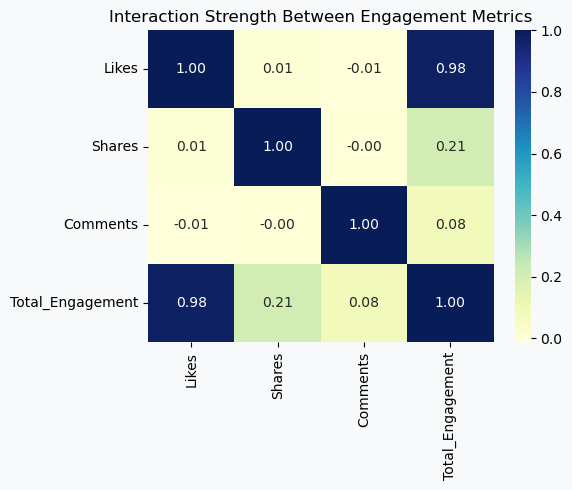

In [109]:
#b. Check interaction strength
interaction_corr = data_frame[['Likes', 'Shares', 'Comments', 'Total_Engagement']].corr()
print(interaction_corr.round(2))

plt.figure(figsize=(6,5), facecolor=background_color)
sns.heatmap(interaction_corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Interaction Strength Between Engagement Metrics')
plt.tight_layout()
plt.savefig('interaction_correlation_heatmap.png', dpi=300)
plt.show()

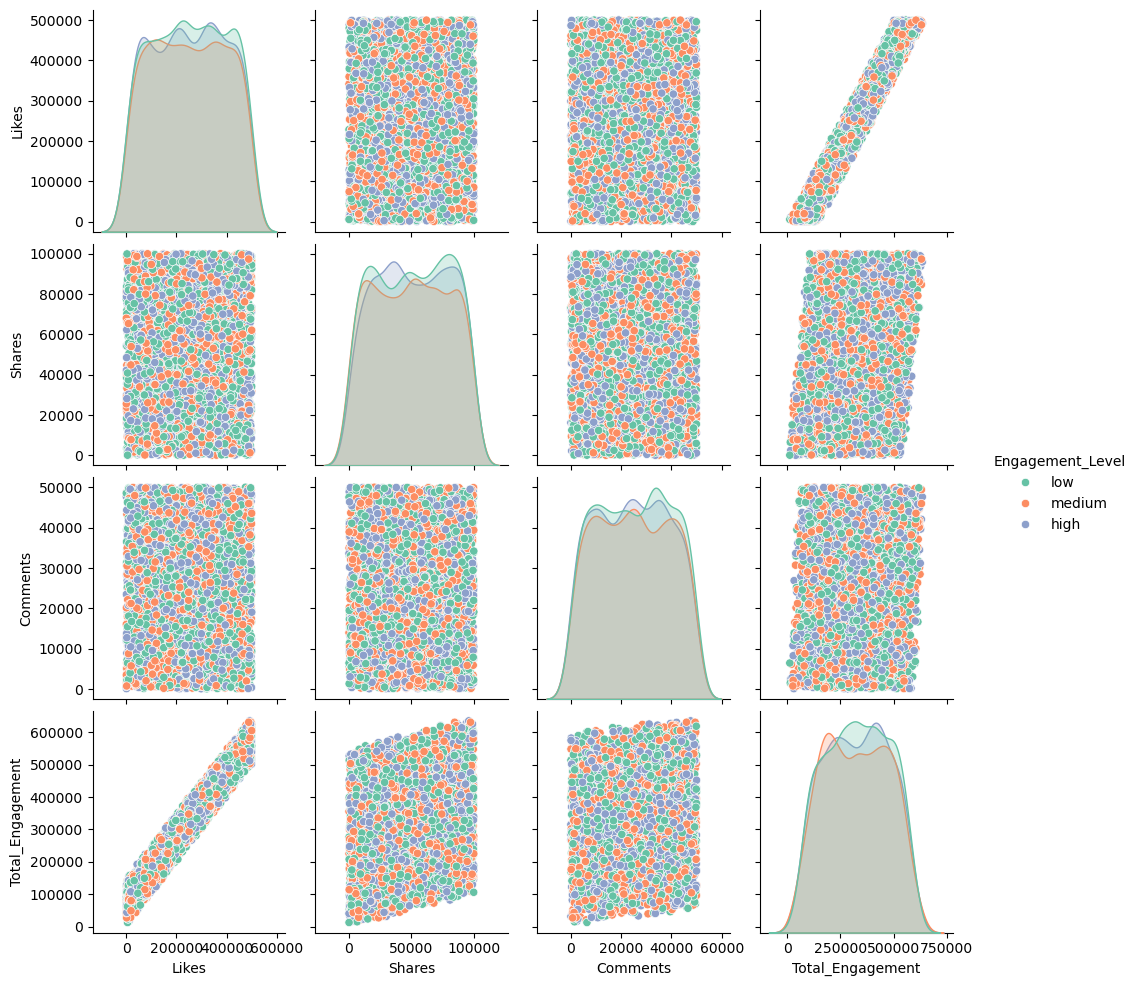

In [111]:
sns.pairplot(data_frame[['Likes', 'Shares', 'Comments', 'Total_Engagement', 'Engagement_Level']], hue='Engagement_Level', palette='Set2')
plt.savefig('interaction_pairplot.png', dpi=300)
plt.show()

Efficient Posts Found: 2026


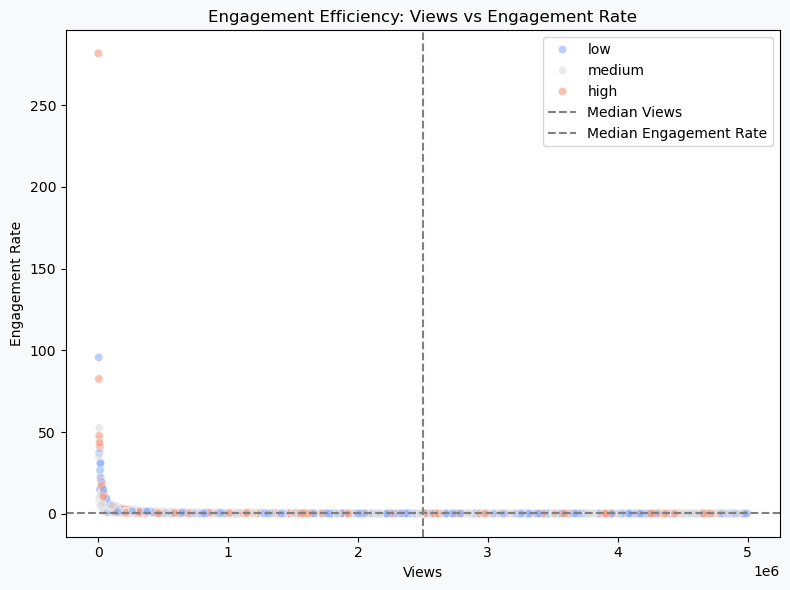

In [115]:
#c. Identify efficient content (low views, high interaction)
# Define thresholds: Low Views (< median), High Engagement Rate (> median)
views_median = data_frame['Views'].median()
engagement_rate_median = data_frame['Engagement_Rate'].median()

efficient_posts = data_frame[(data_frame['Views'] < views_median) & (data_frame['Engagement_Rate'] > engagement_rate_median)]
print(f"Efficient Posts Found: {efficient_posts.shape[0]}")
efficient_posts[['Platform', 'Content_Type', 'Hashtag', 'Views', 'Total_Engagement', 'Engagement_Rate', 'Engagement_Level']].head()

plt.figure(figsize=(8,6), facecolor=background_color)
sns.scatterplot(data=data_frame, x='Views', y='Engagement_Rate', hue='Engagement_Level', alpha=0.6, palette='coolwarm')
plt.axvline(views_median, color='gray', linestyle='--', label='Median Views')
plt.axhline(engagement_rate_median, color='gray', linestyle='--', label='Median Engagement Rate')
plt.title('Engagement Efficiency: Views vs Engagement Rate')
plt.xlabel('Views')
plt.ylabel('Engagement Rate')
plt.legend()
plt.tight_layout()
plt.savefig('efficient_content_scatter.png', dpi=300)
plt.show()

Correlation between Engagement Rate and Comments: 0.023


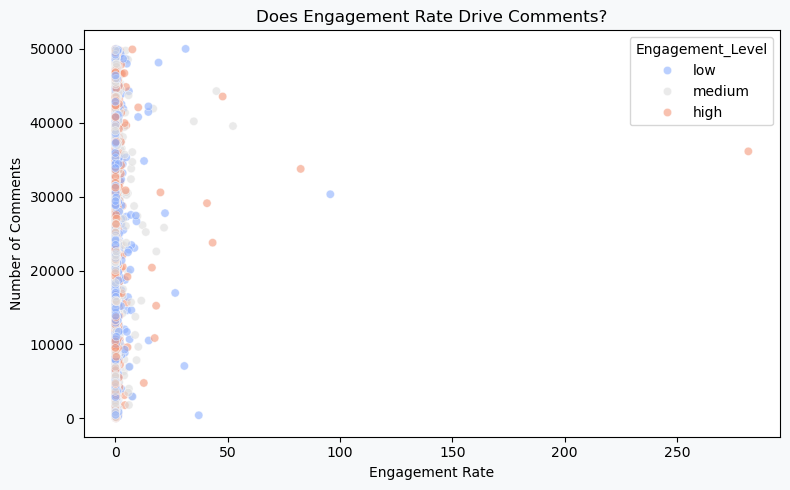

In [117]:
#d. Does rate affect user conversation?
correlation = data_frame[['Engagement_Rate', 'Comments']].corr().loc['Engagement_Rate', 'Comments']
print(f"Correlation between Engagement Rate and Comments: {round(correlation, 3)}")

plt.figure(figsize=(8,5), facecolor=background_color)
sns.scatterplot(data=data_frame, x='Engagement_Rate', y='Comments', hue='Engagement_Level', alpha=0.6, palette='coolwarm')
plt.title('Does Engagement Rate Drive Comments?')
plt.xlabel('Engagement Rate')
plt.ylabel('Number of Comments')
plt.tight_layout()
plt.savefig('engagement_rate_vs_comments.png', dpi=300)
plt.show()

In [119]:
#Bonus combination
#a. Find top-performing format per platform
# Crosstab of Platform vs Content_Type vs Engagement_Level
platform_format_performance = pd.crosstab(
    [data_frame['Platform'], data_frame['Content_Type']],
    data_frame['Engagement_Level'],
    normalize='index'  # Row-wise % to understand format performance within platform
) * 100

# Round and sort
platform_format_performance = platform_format_performance.round(2)
platform_format_performance.sort_values(by='high', ascending=False).head(10)

# Groupby version to find which format has highest avg high engagement % per platform
high_engagement_avg = (
    data_frame.groupby(['Platform', 'Content_Type'])['Engagement_Level']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).round(2)

# Show top-performing format per platform
top_formats = high_engagement_avg.groupby('Platform')['high'].idxmax()
top_scores = high_engagement_avg.groupby('Platform')['high'].max()

for platform, (content_type, score) in zip(top_formats.index, zip(top_formats.values, top_scores.values)):
    print(f"✅ On {platform}, the top-performing format is **{content_type}** with {score:.2f}% High Engagement.")

✅ On instagram, the top-performing format is **('instagram', 'live stream')** with 36.49% High Engagement.
✅ On tiktok, the top-performing format is **('tiktok', 'reel')** with 36.19% High Engagement.
✅ On twitter, the top-performing format is **('twitter', 'reel')** with 39.60% High Engagement.
✅ On youtube, the top-performing format is **('youtube', 'video')** with 39.22% High Engagement.


In [123]:
#b. Discover localization trends in formats
# Focus on top regions to reduce clutter
top_regions = data_frame['Region'].value_counts().head(10).index
data_frame_top_regions = data_frame[data_frame['Region'].isin(top_regions)]

# Crosstab: Region × Content_Type × Engagement_Level
region_format_perf = pd.crosstab(
    [data_frame_top_regions['Region'], data_frame_top_regions['Content_Type']],
    data_frame_top_regions['Engagement_Level'],
    normalize='index'
) * 100

region_format_perf = region_format_perf.round(2)
region_format_perf.sort_values(by='high', ascending=False).head(10)

# Get max-performing format per region by % High Engagement
region_format_summary = (
    data_frame_top_regions.groupby(['Region', 'Content_Type'])['Engagement_Level']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).round(2)

# Best format per region
top_local_formats = region_format_summary.groupby('Region')['high'].idxmax()
top_scores = region_format_summary.groupby('Region')['high'].max()

# Print summary
for region, (format_, score) in zip(top_local_formats.index, zip(top_local_formats.values, top_scores.values)):
    print(f"🌍 In {region}, the best-performing format is **{format_}** with {score:.1f}% High Engagement.")

🌍 In australia, the best-performing format is **('australia', 'post')** with 33.7% High Engagement.
🌍 In brazil, the best-performing format is **('brazil', 'video')** with 39.2% High Engagement.
🌍 In canada, the best-performing format is **('canada', 'reel')** with 37.2% High Engagement.
🌍 In germany, the best-performing format is **('germany', 'video')** with 37.8% High Engagement.
🌍 In india, the best-performing format is **('india', 'tweet')** with 41.2% High Engagement.
🌍 In japan, the best-performing format is **('japan', 'video')** with 42.6% High Engagement.
🌍 In uk, the best-performing format is **('uk', 'video')** with 37.9% High Engagement.
🌍 In usa, the best-performing format is **('usa', 'live stream')** with 45.3% High Engagement.


In [125]:
#c. Spot trending hashtags per platform
# Create a dictionary to hold top hashtags per platform
top_hashtags_by_platform = {}

# Loop through each platform
for platform in data_frame['Platform'].unique():
    top_tags = (
        data_frame[data_frame['Platform'] == platform]['Hashtag']
        .value_counts()
        .head(10)
    )
    top_hashtags_by_platform[platform] = top_tags

# Display top hashtags per platform
for platform, hashtags in top_hashtags_by_platform.items():
    print(f"\n📱 {platform.title()} - Top 10 Hashtags:\n{hashtags}")


📱 Tiktok - Top 10 Hashtags:
Hashtag
#comedy       132
#tech         130
#music        130
#gaming       129
#dance        128
#education    126
#fitness      126
#challenge    125
#viral        119
#fashion      115
Name: count, dtype: int64

📱 Instagram - Top 10 Hashtags:
Hashtag
#fitness      143
#education    131
#music        127
#dance        121
#challenge    120
#comedy       120
#fashion      116
#gaming       114
#tech         110
#viral        110
Name: count, dtype: int64

📱 Twitter - Top 10 Hashtags:
Hashtag
#comedy       130
#fitness      127
#viral        127
#fashion      127
#gaming       123
#education    122
#music        115
#tech         114
#challenge    110
#dance        109
Name: count, dtype: int64

📱 Youtube - Top 10 Hashtags:
Hashtag
#challenge    152
#education    146
#fitness      140
#dance        138
#tech         137
#fashion      129
#viral        125
#comedy       123
#music        121
#gaming       113
Name: count, dtype: int64


Correlation between Hashtag Length and Engagement Rate: -0.009


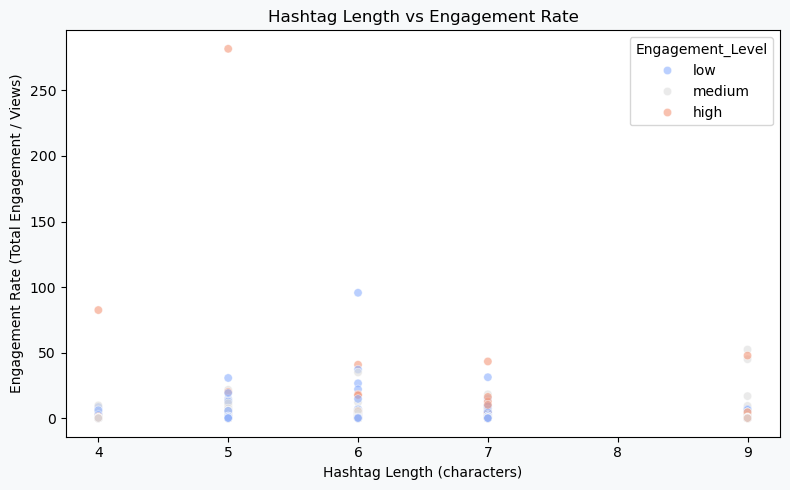

In [127]:
#d. See if short hashtags are more efficient
correlation = data_frame[['Hashtag_Length', 'Engagement_Rate']].corr().loc['Hashtag_Length', 'Engagement_Rate']
print(f"Correlation between Hashtag Length and Engagement Rate: {round(correlation, 3)}")

plt.figure(figsize=(8,5), facecolor=background_color)
sns.scatterplot(data=data_frame, x='Hashtag_Length', y='Engagement_Rate', hue='Engagement_Level', alpha=0.6, palette='coolwarm')
plt.title('Hashtag Length vs Engagement Rate')
plt.xlabel('Hashtag Length (characters)')
plt.ylabel('Engagement Rate (Total Engagement / Views)')
plt.tight_layout()
plt.savefig('hashtag_length_vs_engagement_rate.png', dpi=300)
plt.show()

In [247]:
#3. Multivariate Analysis
#a. Which formats work best on which platforms for virality?
#b. How does format performance vary by region?
#c. Which hashtags trend per platform and lead to high engagement?
#d. Do certain content types drive higher engagement across all levels?
#e. Where are posts most efficient in driving interaction per view?
#f. Spot cluster patterns between Views, Likes, Comments, Shares by class
#g. Find strongest predictors for modeling
#h. Which platforms dominate in which regions?
#i. Do certain formats need shorter hashtags to be effective?
#j. Are Reels more effective in some regions vs others?
#k. Can shares compensate for lower views to boost virality?

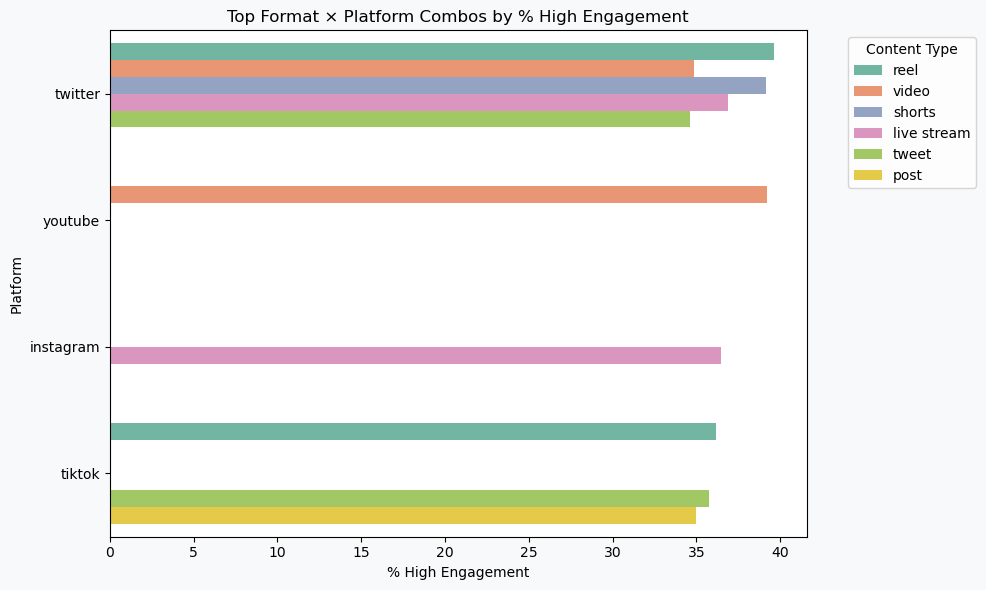

In [135]:
#a. Which formats work best on which platforms for virality?
# Crosstab: Platform × Content_Type × Engagement_Level
platform_format_engagement = pd.crosstab(
    [data_frame['Platform'], data_frame['Content_Type']],
    data_frame['Engagement_Level'],
    normalize='index'
) * 100

platform_format_engagement = platform_format_engagement.round(2)
platform_format_engagement.sort_values(by='high', ascending=False).head(10)

# Get a copy of data where platform-format combos are most frequent
top_combos = (
    data_frame.groupby(['Platform', 'Content_Type'])['Engagement_Level']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
) * 100
top_combos = top_combos.reset_index()

# Plot only top 10 format-platform combos by %High
top_high = top_combos.sort_values(by='high', ascending=False).head(10)

plt.figure(figsize=(10,6), facecolor=background_color)
sns.barplot(data=top_high, x='high', y='Platform', hue='Content_Type', palette='Set2')
plt.title('Top Format × Platform Combos by % High Engagement')
plt.xlabel('% High Engagement')
plt.ylabel('Platform')
plt.legend(title='Content Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('platform_format_virality.png', dpi=300)
plt.show()

Content_Type  live stream   post   reel  shorts  tweet  video
Region                                                       
australia           33.65  33.73  33.33   28.87  32.99  33.65
brazil              32.11  27.87  33.68   35.24  34.51  39.18
canada              33.94  32.20  37.19   28.74  30.84  20.69
germany             33.33  35.71  34.72   37.50  30.12  37.76
india               34.95  33.64  30.51   32.67  41.18  30.23


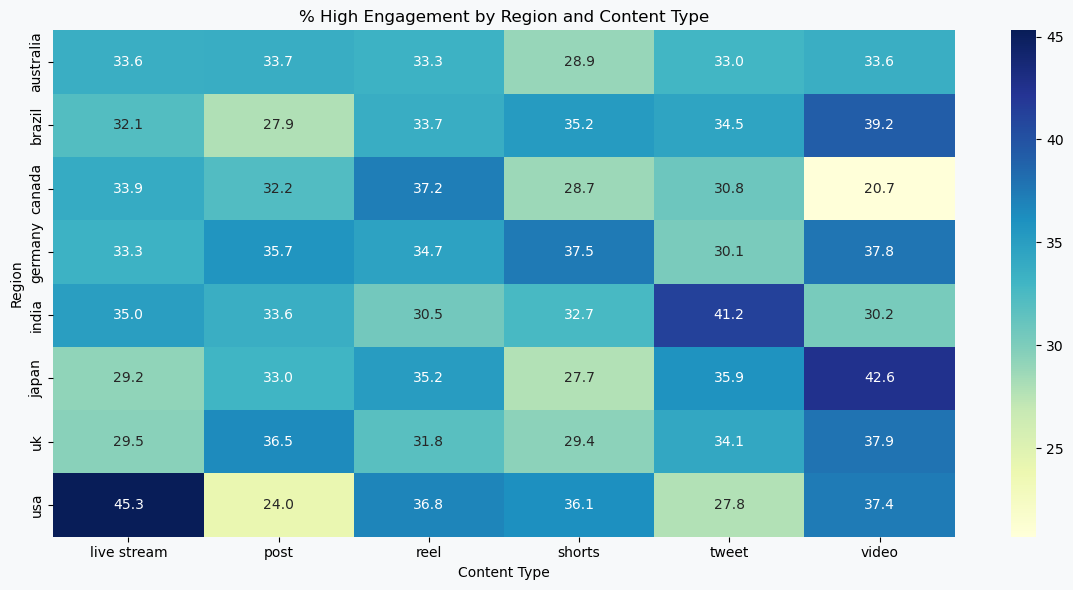

In [137]:
#b. How does format performance vary by region?
# Filter to top 10 regions for clearer analysis
top_regions = data_frame['Region'].value_counts().head(10).index
data_frame_top_regions = data_frame[data_frame['Region'].isin(top_regions)]

# Group and calculate normalized value counts for engagement level
format_region_perf = (
    data_frame_top_regions.groupby(['Region', 'Content_Type'])['Engagement_Level']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).round(2)

# Focus only on % High engagement
high_perf = format_region_perf['high'].unstack().fillna(0)
print(high_perf.head())  # Region × Content Type (High % only)

plt.figure(figsize=(12,6), facecolor=background_color)
sns.heatmap(high_perf, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('% High Engagement by Region and Content Type')
plt.xlabel('Content Type')
plt.ylabel('Region')
plt.tight_layout()
plt.savefig('region_content_type_heatmap.png', dpi=300)
plt.show()

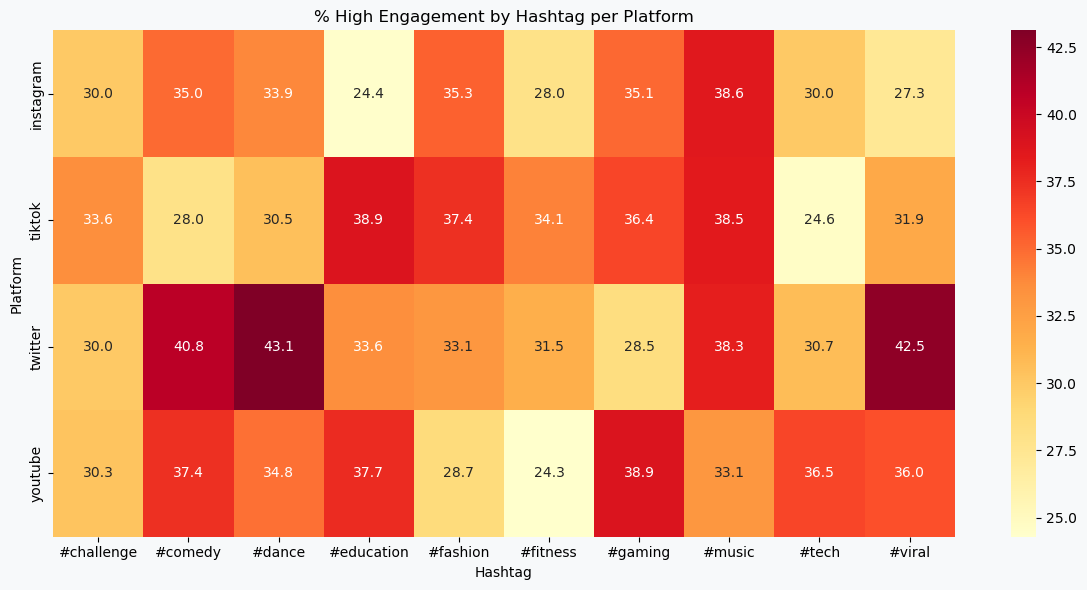

In [141]:
#c. Which hashtags trend per platform and lead to high engagement?
# Optional: focus only on most used hashtags per platform
top_hashtags = data_frame['Hashtag'].value_counts().head(20).index
data_frame_top_tags = data_frame[data_frame['Hashtag'].isin(top_hashtags)]

# Group by Platform and Hashtag, get % High Engagement
platform_hashtag_perf = (
    data_frame_top_tags.groupby(['Platform', 'Hashtag'])['Engagement_Level']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).round(2)

# Focus on high-engagement percentages
platform_high = platform_hashtag_perf['high'].unstack().fillna(0)

plt.figure(figsize=(12,6), facecolor=background_color)
sns.heatmap(platform_high, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('% High Engagement by Hashtag per Platform')
plt.xlabel('Hashtag')
plt.ylabel('Platform')
plt.tight_layout()
plt.savefig('platform_hashtag_high_engagement_heatmap.png', dpi=300)
plt.show()

C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2288429834.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  format_level_stats = data_frame.groupby(['Content_Type', 'Engagement_Level'])[metrics].mean().round(2)
C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2288429834.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_engagement = data_frame.pivot_table(


                                    Views      Likes    Shares  Comments  \
Content_Type Engagement_Level                                              
live stream  low               2485200.84  253081.96  50774.32  24075.98   
             medium            2612246.25  241143.54  48998.98  25865.46   
             high              2361109.45  251085.48  49841.09  25697.45   
post         low               2426404.99  251309.29  48993.68  24196.14   
             medium            2578833.29  256109.20  49884.40  23306.54   
             high              2417601.47  250924.31  51724.40  26242.76   
reel         low               2489506.59  266180.08  50423.86  26396.15   
             medium            2636727.59  255338.62  49780.04  25707.55   
             high              2486424.15  243121.81  53735.07  23573.86   
shorts       low               2578492.10  247114.51  48969.60  25253.89   
             medium            2435386.24  253699.55  49855.68  25281.25   
            

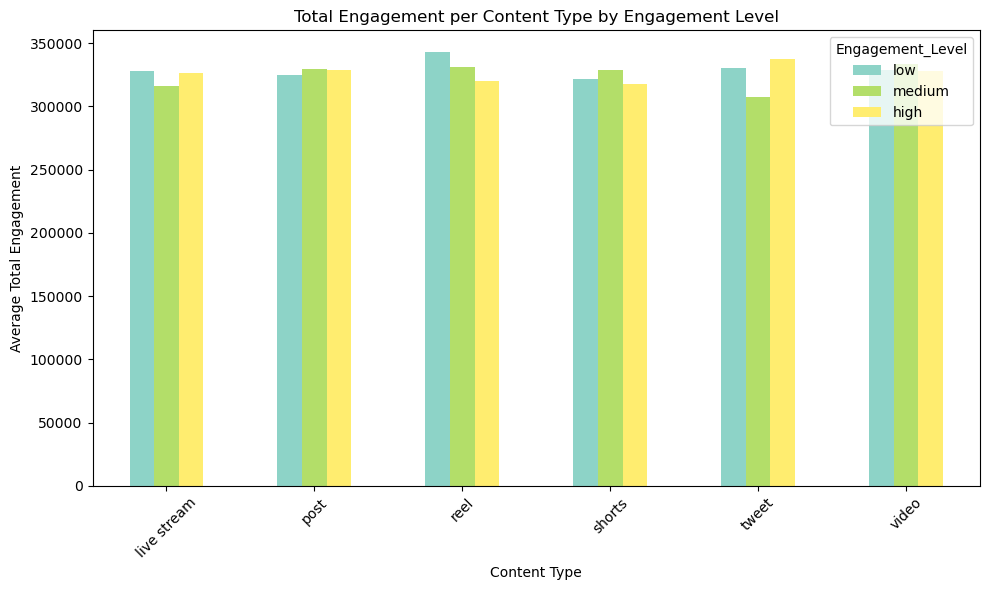

In [145]:
#d. Do certain content types drive higher engagement across all levels?
# Select key metrics
metrics = ['Views', 'Likes', 'Shares', 'Comments', 'Total_Engagement', 'Engagement_Rate']

# Group by Content Type and Engagement Level
format_level_stats = data_frame.groupby(['Content_Type', 'Engagement_Level'])[metrics].mean().round(2)
print(format_level_stats)


pivot_engagement = data_frame.pivot_table(
    index='Content_Type',
    columns='Engagement_Level',
    values='Total_Engagement',
    aggfunc='mean'
).round(2)

print(pivot_engagement.sort_values(by='high', ascending=False))


pivot_engagement.plot(kind='bar', figsize=(10,6), colormap='Set3')
plt.title('Total Engagement per Content Type by Engagement Level')
plt.xlabel('Content Type')
plt.ylabel('Average Total Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('content_type_engagement_levels.png', dpi=300)
plt.show()

Region
usa          0.7186
brazil       0.6286
canada       0.5840
australia    0.5612
japan        0.4273
india        0.3876
uk           0.3699
germany      0.3050
Name: Engagement_Rate, dtype: float64


C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2968071882.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=post_efficiency.head(10), y=post_efficiency.head(10).index, palette='Greens')


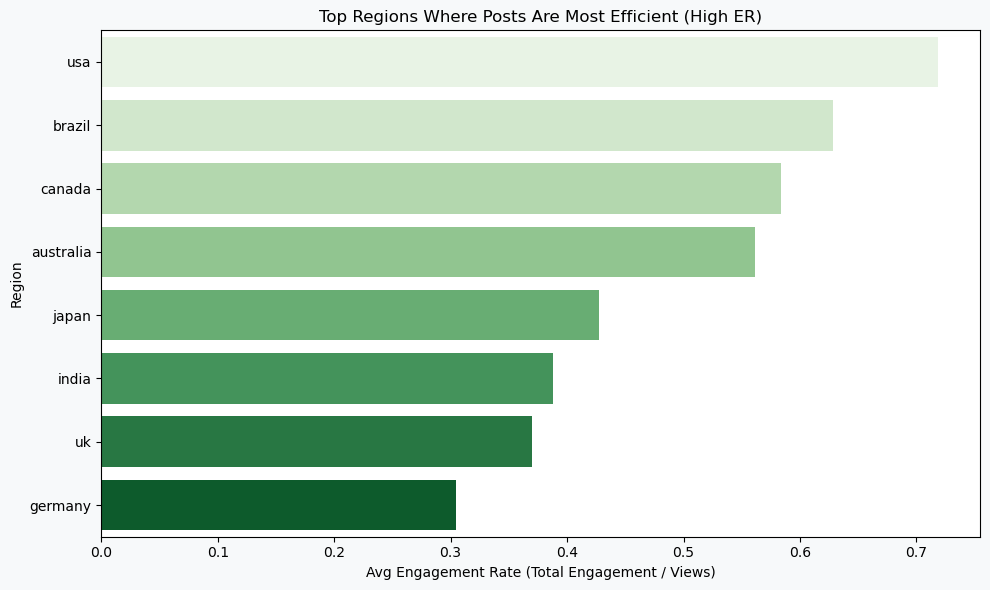

In [147]:
#e. Where are posts most efficient in driving interaction per view?
# Filter dataset to only posts
data_frame_posts = data_frame[data_frame['Content_Type'] == 'post']

# Average Engagement Rate of posts per region
post_efficiency = data_frame_posts.groupby('Region')['Engagement_Rate'].mean().round(4)

# Sort descending to find most efficient regions
post_efficiency = post_efficiency.sort_values(ascending=False)
print(post_efficiency.head(10))  # Top 10 most efficient regions for posts

plt.figure(figsize=(10,6), facecolor=background_color)
sns.barplot(x=post_efficiency.head(10), y=post_efficiency.head(10).index, palette='Greens')
plt.title('Top Regions Where Posts Are Most Efficient (High ER)')
plt.xlabel('Avg Engagement Rate (Total Engagement / Views)')
plt.ylabel('Region')
plt.tight_layout()
plt.savefig('region_post_efficiency.png', dpi=300)
plt.show()

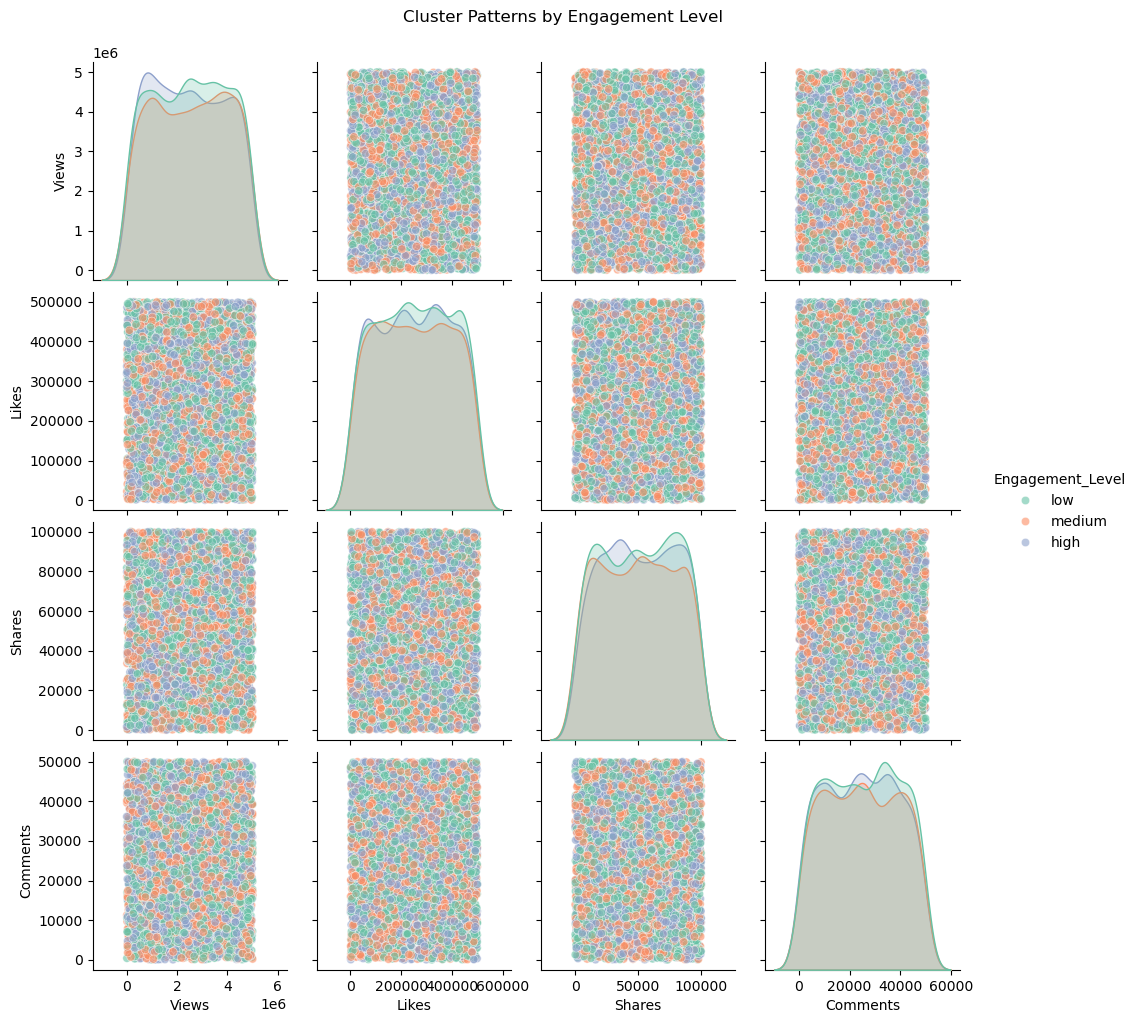

In [149]:
#f. Spot cluster patterns between Views, Likes, Comments, Shares by class
features = ['Views', 'Likes', 'Shares', 'Comments', 'Engagement_Level']
data_frame_pairplot = data_frame[features].copy()

sns.pairplot(data_frame_pairplot, hue='Engagement_Level', palette='Set2', plot_kws={'alpha': 0.6})
plt.suptitle('Cluster Patterns by Engagement Level', y=1.02)
plt.savefig('engagement_clusters_pairplot.png', dpi=300)
plt.show()

In [153]:
#g. Find strongest predictors for modeling
# Encode target as numeric if not done
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['Engagement_Level_Label'] = le.fit_transform(data_frame['Engagement_Level'])

# Compute correlation
corr = data_frame[['Views', 'Likes', 'Shares', 'Comments', 'Total_Engagement', 'Engagement_Rate', 'Hashtag_Length', 'Engagement_Level_Label']].corr()
print(corr['Engagement_Level_Label'].sort_values(ascending=False))



Engagement_Level_Label    1.000000
Views                     0.022851
Hashtag_Length            0.013705
Comments                  0.006350
Likes                    -0.002912
Total_Engagement         -0.006437
Engagement_Rate          -0.010977
Shares                   -0.021454
Name: Engagement_Level_Label, dtype: float64


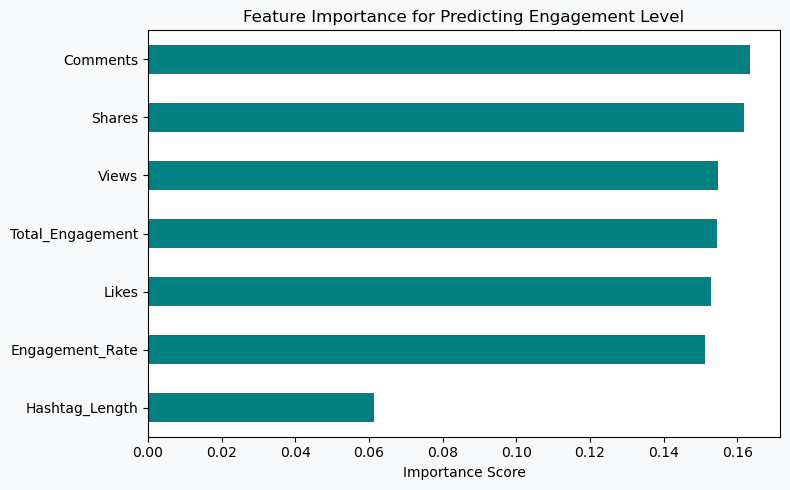

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Select features for modeling
feature_cols = ['Views', 'Likes', 'Shares', 'Comments', 'Total_Engagement', 'Engagement_Rate', 'Hashtag_Length']
X = data_frame[feature_cols]
y = data_frame['Engagement_Level_Label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feat_importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8,5), facecolor=background_color)
feat_importances.plot(kind='barh', color='teal')
plt.title('Feature Importance for Predicting Engagement Level')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()

Platform   instagram  tiktok  twitter  youtube
Region                                        
japan            121     175      143      153
uk               146     175      145      181
brazil           154     161      157      169
canada           179     159      146      174
usa              146     154      192      185
india            154     146      163      154
australia        155     145      143      159
germany          157     145      115      149
Platform   instagram  tiktok  twitter  youtube
Region                                        
australia      25.75   24.09    23.75    26.41
brazil         24.02   25.12    24.49    26.37
canada         27.20   24.16    22.19    26.44
germany        27.74   25.62    20.32    26.33
india          24.96   23.66    26.42    24.96
japan          20.44   29.56    24.16    25.84
uk             22.57   27.05    22.41    27.98
usa            21.57   22.75    28.36    27.33


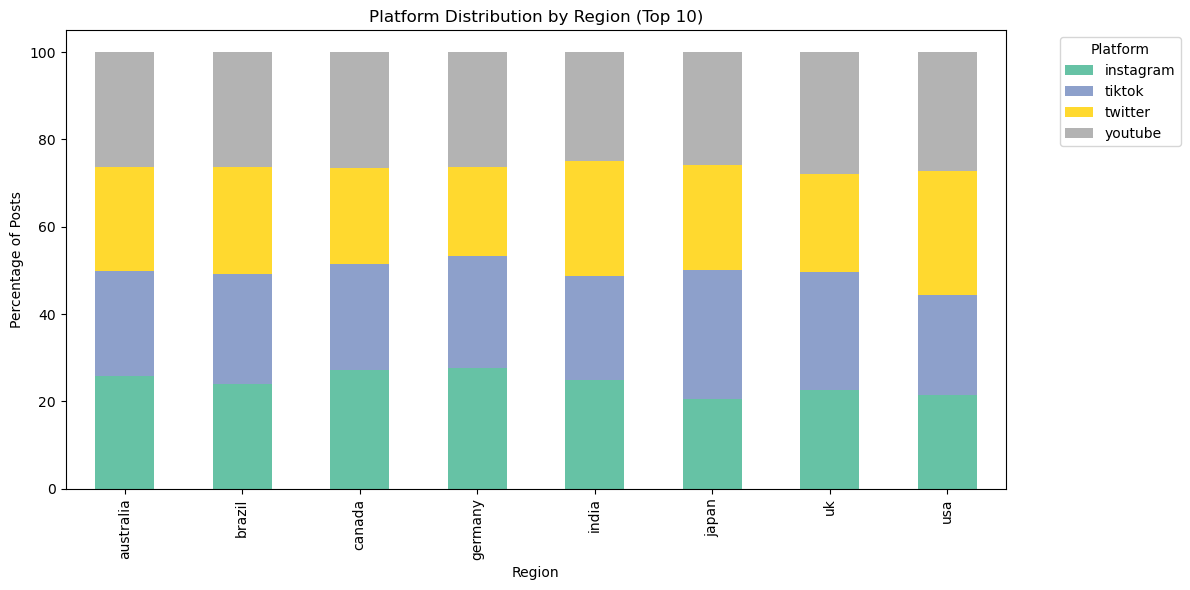

In [157]:
#h. Which platforms dominate in which regions?
# Region vs Platform count
region_platform_ct = pd.crosstab(data_frame['Region'], data_frame['Platform'])
region_platform_ct = region_platform_ct.sort_values(by='tiktok', ascending=False)  # Or 'youtube'

print(region_platform_ct.head(10))  # Top 10 regions by volume

# Normalize row-wise to get platform share in each region
region_platform_pct = pd.crosstab(data_frame['Region'], data_frame['Platform'], normalize='index') * 100
region_platform_pct = region_platform_pct.round(2)

print(region_platform_pct.head(10))

top_regions = data_frame['Region'].value_counts().head(10).index
stacked_data = pd.crosstab(data_frame[data_frame['Region'].isin(top_regions)]['Region'], data_frame['Platform'], normalize='index') * 100

stacked_data.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Platform Distribution by Region (Top 10)')
plt.ylabel('Percentage of Posts')
plt.xlabel('Region')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('platform_dominance_by_region.png', dpi=300)
plt.show()

C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2021141259.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_frame.groupby(['Content_Type', 'Hashtag_Length_Bin'])['Engagement_Rate']


Hashtag_Length_Bin   Short  Medium  Long
Content_Type                            
live stream         0.8195  0.3453   NaN
post                0.4412  0.5802   NaN
reel                0.4929  0.4802   NaN
shorts              0.9384  0.6261   NaN
tweet               0.4651  0.6011   NaN
video               0.5575  0.3741   NaN


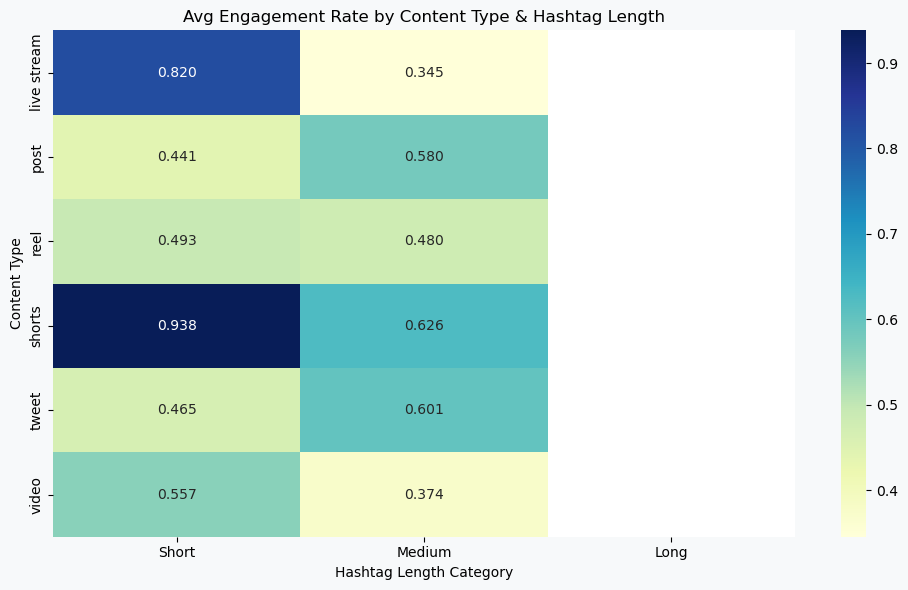

In [161]:
#i. Do certain formats need shorter hashtags to be effective?
# Create hashtag length categories
data_frame['Hashtag_Length_Bin'] = pd.cut(
    data_frame['Hashtag_Length'],
    bins=[0, 6, 10, 20],
    labels=['Short', 'Medium', 'Long']
)

# Average engagement rate by content type and hashtag length
format_hashtag_eff = (
    data_frame.groupby(['Content_Type', 'Hashtag_Length_Bin'])['Engagement_Rate']
    .mean()
    .unstack()
    .round(4)
)

print(format_hashtag_eff)

plt.figure(figsize=(10,6), facecolor=background_color)
sns.heatmap(format_hashtag_eff, annot=True, fmt=".3f", cmap='YlGnBu')
plt.title('Avg Engagement Rate by Content Type & Hashtag Length')
plt.xlabel('Hashtag Length Category')
plt.ylabel('Content Type')
plt.tight_layout()
plt.savefig('format_hashtag_efficiency_heatmap.png', dpi=300)
plt.show()

Region
usa          0.7868
australia    0.5346
uk           0.5147
canada       0.4788
india        0.4494
brazil       0.3866
germany      0.3786
japan        0.2619
Name: Engagement_Rate, dtype: float64


C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2113244729.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reel_efficiency_by_region.head(10), y=reel_efficiency_by_region.head(10).index, palette='coolwarm')


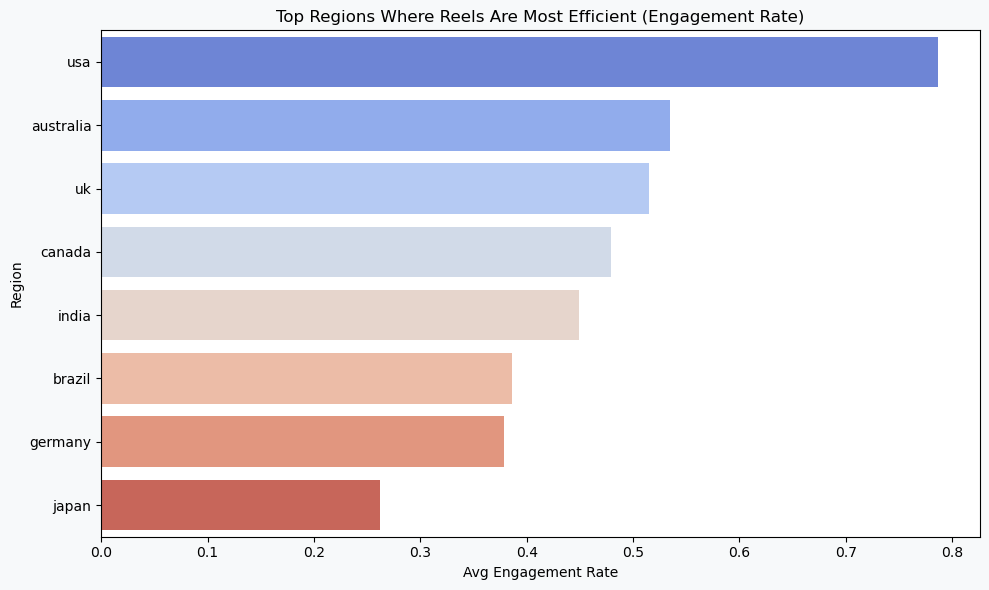

In [163]:
#j. Are Reels more effective in some regions vs others?
# Focus only on Reels
data_frame_reels = data_frame[data_frame['Content_Type'] == 'reel']

# Group by region and calculate average engagement rate
reel_efficiency_by_region = data_frame_reels.groupby('Region')['Engagement_Rate'].mean().sort_values(ascending=False).round(4)

# Display top-performing regions for Reels
print(reel_efficiency_by_region.head(10))

plt.figure(figsize=(10,6), facecolor=background_color)
sns.barplot(x=reel_efficiency_by_region.head(10), y=reel_efficiency_by_region.head(10).index, palette='coolwarm')
plt.title('Top Regions Where Reels Are Most Efficient (Engagement Rate)')
plt.xlabel('Avg Engagement Rate')
plt.ylabel('Region')
plt.tight_layout()
plt.savefig('reel_efficiency_by_region.png', dpi=300)
plt.show()

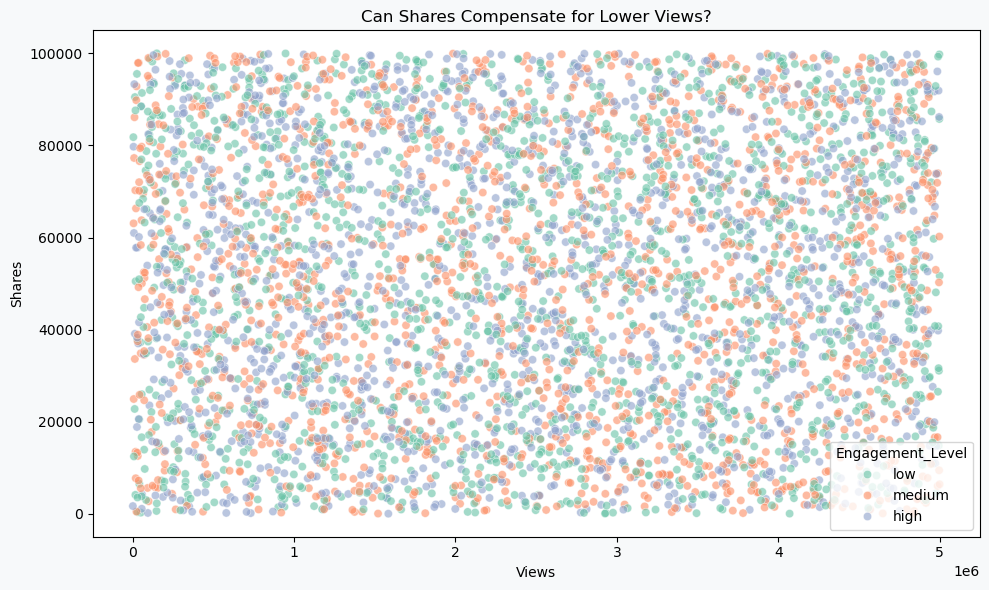

In [167]:
#k. Can shares compensate for lower views to boost virality?
plt.figure(figsize=(10,6), facecolor=background_color)
sns.scatterplot(data=data_frame, x='Views', y='Shares', hue='Engagement_Level', palette='Set2', alpha=0.6)
plt.title('Can Shares Compensate for Lower Views?')
plt.xlabel('Views')
plt.ylabel('Shares')
plt.tight_layout()
plt.savefig('shares_vs_views_by_engagement.png', dpi=300)
plt.show()

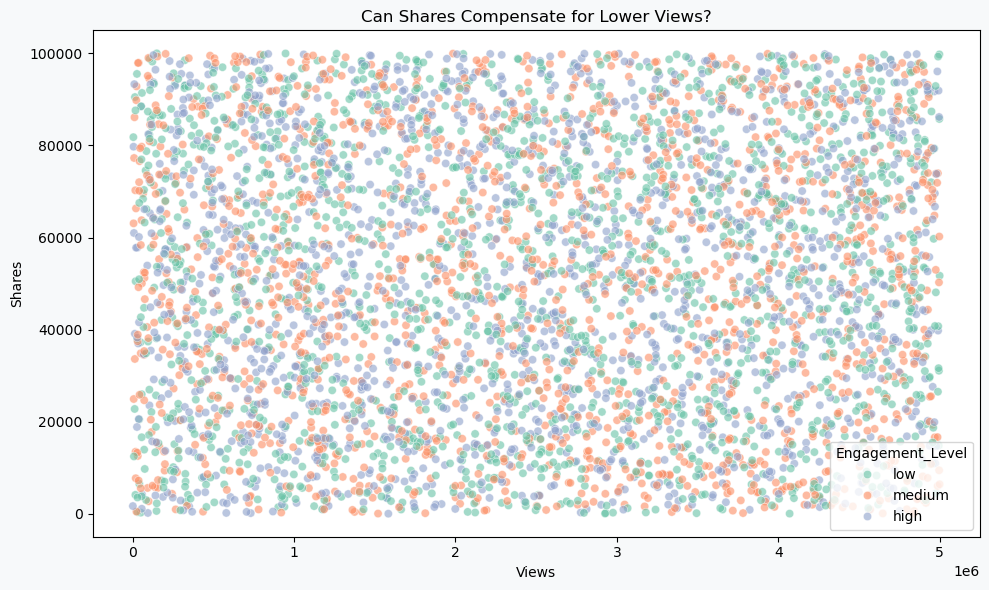

In [169]:
plt.figure(figsize=(10,6), facecolor=background_color)
sns.scatterplot(data=data_frame, x='Views', y='Shares', hue='Engagement_Level', palette='Set2', alpha=0.6)
plt.title('Can Shares Compensate for Lower Views?')
plt.xlabel('Views')
plt.ylabel('Shares')
plt.tight_layout()
plt.savefig('shares_vs_views_by_engagement.png', dpi=300)
plt.show()

In [171]:
#Feature Engineering
#a. Total engagement
# Create the Total_Engagement feature
data_frame['Total_Engagement'] = data_frame['Likes'] + data_frame['Shares'] + data_frame['Comments']
# Group by Engagement_Level to see average total engagement
avg_engagement_by_level = data_frame.groupby('Engagement_Level')['Total_Engagement'].mean().sort_values(ascending=False)
print(avg_engagement_by_level)

Engagement_Level
low       329490.248699
high      326687.514644
medium    324266.630788
Name: Total_Engagement, dtype: float64


C:\Users\sinan\AppData\Local\Temp\ipykernel_14180\2694763056.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_engagement_by_level = data_frame.groupby('Engagement_Level')['Total_Engagement'].mean().sort_values(ascending=False)
